In [0]:
import glob
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import keras
from keras import Sequential
from keras.layers import Dense,LSTM,Dropout,Bidirectional,CuDNNLSTM,Activation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.activations import relu,sigmoid
from keras.optimizers import Adam
from keras.losses import mae
import requests
import datetime

In [0]:
def daily_price_historical(symbol, comparison_symbol, all_data=True, limit=1, aggregate=1, exchange=''):
    url = 'https://min-api.cryptocompare.com/data/histoday?fsym={}&tsym={}&limit={}&aggregate={}'\
            .format(symbol.upper(), comparison_symbol.upper(), limit, aggregate)
    if exchange:
        url += '&e={}'.format(exchange)
    if all_data:
        url += '&allData=true'
    page = requests.get(url)
    data = page.json()['Data']
    df = pd.DataFrame(data)
    df['timestamp'] = [datetime.datetime.fromtimestamp(d) for d in df.time]
    return df

In [0]:
dfff = daily_price_historical("BTC","USD")

In [0]:
chainlink = daily_price_historical("Link","USD")
dash = daily_price_historical("DASH","USD")
xrp = daily_price_historical("XRP","USD")
bitcoin = daily_price_historical("BTC","USD")
neo = daily_price_historical("Neo","USD")
ethereum = daily_price_historical("ETH","USD")
eos = daily_price_historical("EOS","USD")
litecoin = daily_price_historical("LTC","USD")

Converting all dates to correct format and sorting them accordingly

In [0]:
bitcoin['timestamp'] = pd.to_datetime(bitcoin['timestamp'])
bitcoin.sort_values(by = 'timestamp',inplace=True)
chainlink['timestamp'] = pd.to_datetime(chainlink['timestamp'])
chainlink.sort_values(by = 'timestamp',inplace=True)
dash['timestamp'] = pd.to_datetime(dash['timestamp'])
dash.sort_values(by = 'timestamp',inplace=True)
xrp['timestamp'] = pd.to_datetime(xrp['timestamp'])
xrp.sort_values(by = 'timestamp',inplace=True)
neo['timestamp'] = pd.to_datetime(neo['timestamp'])
neo.sort_values(by = 'timestamp',inplace=True)
ethereum['timestamp'] = pd.to_datetime(ethereum['timestamp'])
ethereum.sort_values(by = 'timestamp',inplace=True)
eos['timestamp'] = pd.to_datetime(eos['timestamp'])
eos.sort_values(by = 'timestamp',inplace=True)
litecoin['timestamp'] = pd.to_datetime(litecoin['timestamp'])
litecoin.sort_values(by = 'timestamp',inplace=True)

Selecting all the data after 2020 from social dataset for testing

In [0]:
bitcoin_social = bitcoin[bitcoin.timestamp.dt.year >= 2020].reset_index().drop(['index'],axis=1)
chainlink_social = chainlink[chainlink.timestamp.dt.year >= 2020].reset_index().drop(['index'],axis=1)
dash_social = dash[dash.timestamp.dt.year >= 2020].reset_index().drop(['index'],axis=1)
xrp_social = xrp[xrp.timestamp.dt.year >= 2020].reset_index().drop(['index'],axis=1)
neo_social = neo[neo.timestamp.dt.year >= 2020].reset_index().drop(['index'],axis=1)
ethereum_social = ethereum[ethereum.timestamp.dt.year >= 2020].reset_index().drop(['index'],axis=1)
eos_social = eos[eos.timestamp.dt.year >= 2020].reset_index().drop(['index'],axis=1)
litecoin_social = litecoin[litecoin.timestamp.dt.year >= 2020].reset_index().drop(['index'],axis=1)

In [0]:
bitcoin = bitcoin[bitcoin.timestamp.dt.year < 2020].reset_index().drop(['index'],axis=1)
chainlink = chainlink[chainlink.timestamp.dt.year < 2020].reset_index().drop(['index'],axis=1)
dash = dash[dash.timestamp.dt.year < 2020].reset_index().drop(['index'],axis=1)
xrp = xrp[xrp.timestamp.dt.year < 2020].reset_index().drop(['index'],axis=1)
neo = neo[neo.timestamp.dt.year < 2020].reset_index().drop(['index'],axis=1)
ethereum = ethereum[ethereum.timestamp.dt.year < 2020].reset_index().drop(['index'],axis=1)
eos = eos[eos.timestamp.dt.year < 2020].reset_index().drop(['index'],axis=1)
litecoin = litecoin[litecoin.timestamp.dt.year < 2020].reset_index().drop(['index'],axis=1)

Filling missing values

In [0]:
curr = [bitcoin, chainlink, dash, xrp, neo, ethereum, eos, litecoin,
       bitcoin_social, chainlink_social, dash_social, xrp_social, neo_social, ethereum_social, 
        eos_social, litecoin_social]

In [0]:
for c in curr:
    for col in c.columns:
        if c[col].isnull().any():
            c[col].fillna(c[col].mean(),inplace=True)

# Bitcoins

In [0]:
bitcoin.head()

time    close     high      low     open  volumefrom  volumeto  \
0  1279324800  0.04951  0.04951  0.04951  0.04951       20.00    0.9902   
1  1279411200  0.08584  0.08585  0.05941  0.04951       75.01    5.0920   
2  1279497600  0.08080  0.09307  0.07723  0.08584      574.00   49.6600   
3  1279584000  0.07474  0.08181  0.07426  0.08080      262.00   20.5900   
4  1279670400  0.07921  0.07921  0.06634  0.07474      575.00   42.2600   

            timestamp  
0 2010-07-17 05:00:00  
1 2010-07-18 05:00:00  
2 2010-07-19 05:00:00  
3 2010-07-20 05:00:00  
4 2010-07-21 05:00:00

In [0]:
bitcoin.dtypes

time                   int64
close                float64
high                 float64
low                  float64
open                 float64
volumefrom           float64
volumeto             float64
timestamp     datetime64[ns]
dtype: object

In [0]:
bitcoin['timestamp'] = pd.to_datetime(bitcoin['timestamp'])

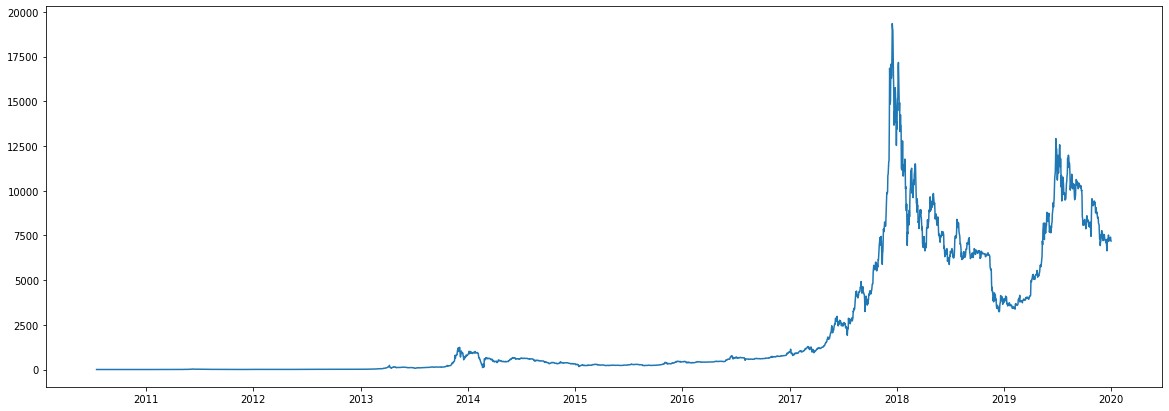

In [0]:
plt.figure(figsize=(20,7))
plt.plot(bitcoin['timestamp'],bitcoin['close'],)

In [0]:
bitcoin['timestamp'] = pd.to_datetime(bitcoin['timestamp'])
bitcoin.sort_values(by = 'timestamp',inplace=True)

Bitcoins reached its peak in 2018

In [0]:
bitcoin.head()

time    close     high      low     open  volumefrom  volumeto  \
0  1279324800  0.04951  0.04951  0.04951  0.04951       20.00    0.9902   
1  1279411200  0.08584  0.08585  0.05941  0.04951       75.01    5.0920   
2  1279497600  0.08080  0.09307  0.07723  0.08584      574.00   49.6600   
3  1279584000  0.07474  0.08181  0.07426  0.08080      262.00   20.5900   
4  1279670400  0.07921  0.07921  0.06634  0.07474      575.00   42.2600   

            timestamp  
0 2010-07-17 05:00:00  
1 2010-07-18 05:00:00  
2 2010-07-19 05:00:00  
3 2010-07-20 05:00:00  
4 2010-07-21 05:00:00

In [0]:
X = pd.concat([pd.DataFrame(bitcoin.index),bitcoin['open']],axis=1)
y = bitcoin['close'].copy()

In [0]:
X = np.array(X)

In [0]:
X_transformed = X.reshape((X.shape[0],X.shape[1],1))

In [0]:
bitcoin_lstm = keras.Sequential()

In [0]:
bitcoin_lstm.add(LSTM(16,activation=relu,input_shape=(X.shape[1],1),return_sequences=True))
bitcoin_lstm.add(Dropout(0.25))
bitcoin_lstm.add(LSTM(32,activation=relu,input_shape=(5,1),return_sequences=True))
bitcoin_lstm.add(Dropout(0.25))
bitcoin_lstm.add(LSTM(64,activation=relu,input_shape=(5,1)))
bitcoin_lstm.add(Dropout(0.25))
bitcoin_lstm.add(Dense(512,activation=relu))
bitcoin_lstm.add(Dense(512,activation=relu))
bitcoin_lstm.add(Dropout(0.4))
bitcoin_lstm.add(Dense(1))

In [0]:
bitcoin_lstm.compile(optimizer='Adam',loss='mae')

In [0]:
X_train,X_test,y_train,y_test = train_test_split(X_transformed,y,test_size=0.3)

In [0]:
bitcoin_lstm.fit(X_train,y_train,epochs=500,validation_data=(X_test,y_test),batch_size=120,
         callbacks=[keras.callbacks.EarlyStopping(patience=20,monitor='val_loss')],shuffle=False)

Train on 2418 samples, validate on 1037 samples
Epoch 1/500
2418/2418 [==============================] - 2s 833us/step - loss: 1742.1396 - val_loss: 975.5664
Epoch 2/500
2418/2418 [==============================] - 0s 147us/step - loss: 994.5694 - val_loss: 837.2189
Epoch 3/500
2418/2418 [==============================] - 0s 153us/step - loss: 631.6522 - val_loss: 1018.0737
Epoch 4/500
2418/2418 [==============================] - 0s 157us/step - loss: 579.2745 - val_loss: 1043.6939
Epoch 5/500
2418/2418 [==============================] - 0s 177us/step - loss: 508.3299 - val_loss: 1164.4218
Epoch 6/500
2418/2418 [==============================] - 0s 156us/step - loss: 497.9173 - val_loss: 1108.8673
Epoch 7/500
2418/2418 [==============================] - 0s 153us/step - loss: 469.6626 - val_loss: 1073.4281
Epoch 8/500
2418/2418 [==============================] - 0s 151us/step - loss: 451.4040 - val_loss: 1194.5142
Epoch 9/500
2418/2418 [==============================] - 0s 164us/step - 

In [0]:
bitcoin_lstm.fit(X_transformed,y,epochs=100,batch_size=50,verbose=1,
         callbacks=[keras.callbacks.EarlyStopping(patience=20,monitor='loss')],shuffle=False)

Epoch 1/100
3455/3455 [==============================] - 1s 264us/step - loss: 281.9079
Epoch 2/100
3455/3455 [==============================] - 1s 258us/step - loss: 420.0361
Epoch 3/100
3455/3455 [==============================] - 1s 273us/step - loss: 604.6634
Epoch 4/100
3455/3455 [==============================] - 1s 259us/step - loss: 734.3069
Epoch 5/100
3455/3455 [==============================] - 1s 280us/step - loss: 694.2951
Epoch 6/100
3455/3455 [==============================] - 1s 258us/step - loss: 491.6778
Epoch 7/100
3455/3455 [==============================] - 1s 266us/step - loss: 344.5801
Epoch 8/100
3455/3455 [==============================] - 1s 309us/step - loss: 385.0873
Epoch 9/100
3455/3455 [==============================] - 2s 467us/step - loss: 577.2726
Epoch 10/100
3455/3455 [==============================] - 1s 293us/step - loss: 363.9545
Epoch 11/100
3455/3455 [==============================] - 1s 273us/step - loss: 308.2624
Epoch 12/100
3455/3455 [======

Model is now ready to use!

# Chainlink 

In [0]:
chainlink.head()

time  close   high    low   open  volumefrom     volumeto  \
0  1562025600  3.737  3.950  3.570  3.700  5509757.83  20790184.16   
1  1562112000  3.500  3.850  3.444  3.737  5753274.02  21055678.52   
2  1562198400  3.462  3.610  3.222  3.500  4265061.96  14611943.90   
3  1562284800  3.650  3.747  3.410  3.462  4530231.13  16336975.74   
4  1562371200  3.486  3.667  3.455  3.650  2546458.72   9042235.58   

            timestamp  
0 2019-07-02 05:00:00  
1 2019-07-03 05:00:00  
2 2019-07-04 05:00:00  
3 2019-07-05 05:00:00  
4 2019-07-06 05:00:00

In [0]:
chainlink.dtypes

time                   int64
close                float64
high                 float64
low                  float64
open                 float64
volumefrom           float64
volumeto             float64
timestamp     datetime64[ns]
dtype: object

In [0]:
chainlink['timestamp'] = pd.to_datetime(chainlink['timestamp'])

In [0]:
chainlink.sort_values(by = 'timestamp',inplace=True)

In [0]:
chainlink.dtypes

time                   int64
close                float64
high                 float64
low                  float64
open                 float64
volumefrom           float64
volumeto             float64
timestamp     datetime64[ns]
dtype: object

In [0]:
plt.figure(figsize=(20,7))
plt.plot(chainlink['timestamp'],chainlink['close'],)

Chainlink reached its peak between 1st and 4th month of 2020

In [0]:
X = chainlink.drop(['timestamp','close'],axis=1)
y = chainlink['close'].copy()

In [0]:
X_transformed = MinMaxScaler().fit_transform(X)

In [0]:
X_transformed = X_transformed.reshape((X_transformed.shape[0],X_transformed.shape[1],1))

In [0]:
chainlink_lstm = keras.Sequential()

In [0]:
chainlink_lstm.add(LSTM(16,activation=relu,input_shape=(X.shape[1],1),return_sequences=True))
chainlink_lstm.add(Dropout(0.25))
chainlink_lstm.add(LSTM(32,activation=relu,input_shape=(5,1),return_sequences=True))
chainlink_lstm.add(Dropout(0.25))
chainlink_lstm.add(LSTM(64,activation=relu))
chainlink_lstm.add(Dropout(0.25))
chainlink_lstm.add(Dense(1))

In [0]:
chainlink_lstm.compile(optimizer='Adam',loss='mae')

In [0]:
X_train,X_test,y_train,y_test = train_test_split(X_transformed,y,test_size=0.3)

In [0]:
chainlink_lstm.fit(X_train,y_train,epochs=500,validation_data=(X_test,y_test),batch_size=50,
         callbacks=[keras.callbacks.EarlyStopping(patience=20,monitor='val_loss')],shuffle=False)

Train on 128 samples, validate on 55 samples
Epoch 1/500
128/128 [==============================] - 2s 14ms/step - loss: 2.3384 - val_loss: 2.1904
Epoch 2/500
128/128 [==============================] - 0s 609us/step - loss: 2.3167 - val_loss: 2.1677
Epoch 3/500
128/128 [==============================] - 0s 518us/step - loss: 2.2895 - val_loss: 2.1391
Epoch 4/500
128/128 [==============================] - 0s 610us/step - loss: 2.2572 - val_loss: 2.1026
Epoch 5/500
128/128 [==============================] - 0s 596us/step - loss: 2.2174 - val_loss: 2.0547
Epoch 6/500
128/128 [==============================] - 0s 532us/step - loss: 2.1591 - val_loss: 1.9896
Epoch 7/500
128/128 [==============================] - 0s 588us/step - loss: 2.0851 - val_loss: 1.8984
Epoch 8/500
128/128 [==============================] - 0s 552us/step - loss: 1.9703 - val_loss: 1.7665
Epoch 9/500
128/128 [==============================] - 0s 572us/step - loss: 1.7983 - val_loss: 1.5687
Epoch 10/500
128/128 [=======

128/128 [==============================] - 0s 530us/step - loss: 0.1820 - val_loss: 0.1213
Epoch 158/500
128/128 [==============================] - 0s 555us/step - loss: 0.2118 - val_loss: 0.0741
Epoch 159/500
128/128 [==============================] - 0s 528us/step - loss: 0.2118 - val_loss: 0.0866
Epoch 160/500
128/128 [==============================] - 0s 462us/step - loss: 0.2402 - val_loss: 0.0710
Epoch 161/500
128/128 [==============================] - 0s 453us/step - loss: 0.2174 - val_loss: 0.1079
Epoch 162/500
128/128 [==============================] - 0s 634us/step - loss: 0.2163 - val_loss: 0.0678
Epoch 163/500
128/128 [==============================] - 0s 517us/step - loss: 0.2229 - val_loss: 0.0747
Epoch 164/500
128/128 [==============================] - 0s 541us/step - loss: 0.2096 - val_loss: 0.0911
Epoch 165/500
128/128 [==============================] - 0s 502us/step - loss: 0.2090 - val_loss: 0.0774


In [0]:
chainlink_lstm.fit(X_transformed,y,epochs=500,batch_size=50,verbose=1,
        callbacks=[keras.callbacks.EarlyStopping(patience=20,monitor='loss')],shuffle=False)

Epoch 1/500
183/183 [==============================] - 0s 424us/step - loss: 0.2008
Epoch 2/500
183/183 [==============================] - 0s 542us/step - loss: 0.1966
Epoch 3/500
183/183 [==============================] - 0s 644us/step - loss: 0.1935
Epoch 4/500
183/183 [==============================] - 0s 425us/step - loss: 0.2213
Epoch 5/500
183/183 [==============================] - 0s 375us/step - loss: 0.2079
Epoch 6/500
183/183 [==============================] - 0s 467us/step - loss: 0.2093
Epoch 7/500
183/183 [==============================] - 0s 497us/step - loss: 0.1915
Epoch 8/500
183/183 [==============================] - 0s 434us/step - loss: 0.2072
Epoch 9/500
183/183 [==============================] - 0s 435us/step - loss: 0.1859
Epoch 10/500
183/183 [==============================] - 0s 386us/step - loss: 0.2079
Epoch 11/500
183/183 [==============================] - 0s 390us/step - loss: 0.1993
Epoch 12/500
183/183 [==============================] - 0s 377us/step - lo

Model is now ready to use!

# DASH

In [0]:
dash.head()

time  close  high   low  open  volumefrom  volumeto  \
0  1391817600   0.07  0.07  0.05  0.05     427.450   29.3700   
1  1391904000   0.10  0.10  0.07  0.07       9.101    0.9101   
2  1391990400   0.10  0.10  0.10  0.10       0.000    0.0000   
3  1392076800   0.10  0.10  0.10  0.10       0.000    0.0000   
4  1392163200   0.10  0.10  0.10  0.10       0.000    0.0000   

            timestamp  
0 2014-02-08 05:00:00  
1 2014-02-09 05:00:00  
2 2014-02-10 05:00:00  
3 2014-02-11 05:00:00  
4 2014-02-12 05:00:00

In [0]:
dash.dtypes

time                   int64
close                float64
high                 float64
low                  float64
open                 float64
volumefrom           float64
volumeto             float64
timestamp     datetime64[ns]
dtype: object

In [0]:
dash['timestamp'] = pd.to_datetime(dash['timestamp'])

In [0]:
dash.sort_values(by = 'timestamp',inplace=True)

In [0]:
dash.dtypes

time                   int64
close                float64
high                 float64
low                  float64
open                 float64
volumefrom           float64
volumeto             float64
timestamp     datetime64[ns]
dtype: object

In [0]:
plt.figure(figsize=(20,7))
plt.plot(dash['timestamp'],dash['close'],)

DASH reached its peak in 2018

In [0]:
X = dash.drop(['timestamp','close'],axis=1)
y = dash['close'].copy()

In [0]:
X_transformed = MinMaxScaler().fit_transform(X)

In [0]:
X_transformed = X_transformed.reshape((X_transformed.shape[0],X_transformed.shape[1],1))

In [0]:
dash_lstm = keras.Sequential()

In [0]:
dash_lstm.add(LSTM(32,activation=relu,input_shape=(X.shape[1],1),return_sequences=True))
dash_lstm.add(Dropout(0.3))
dash_lstm.add(LSTM(32,activation=relu,input_shape=(5,1)))
dash_lstm.add(Dropout(0.3))
dash_lstm.add(Dense(1))

In [0]:
dash_lstm.compile(optimizer='Adam',loss='mae')

In [0]:
X_train,X_test,y_train,y_test = train_test_split(X_transformed,y,test_size=0.3)

In [0]:
dash_lstm.fit(X_train,y_train,epochs=500,validation_data=(X_test,y_test),batch_size=50,
         callbacks=[keras.callbacks.EarlyStopping(patience=20,monitor='val_loss')],shuffle=False)

Train on 1507 samples, validate on 646 samples
Epoch 1/500
1507/1507 [==============================] - 2s 999us/step - loss: 118.1151 - val_loss: 113.8805
Epoch 2/500
1507/1507 [==============================] - 0s 186us/step - loss: 111.7986 - val_loss: 78.3988
Epoch 3/500
1507/1507 [==============================] - 0s 187us/step - loss: 51.9484 - val_loss: 33.5395
Epoch 4/500
1507/1507 [==============================] - 0s 189us/step - loss: 37.8596 - val_loss: 28.7966
Epoch 5/500
1507/1507 [==============================] - 0s 195us/step - loss: 32.2968 - val_loss: 23.5803
Epoch 6/500
1507/1507 [==============================] - 0s 197us/step - loss: 29.7256 - val_loss: 22.5272
Epoch 7/500
1507/1507 [==============================] - 0s 199us/step - loss: 25.0452 - val_loss: 15.6837
Epoch 8/500
1507/1507 [==============================] - 0s 196us/step - loss: 22.3688 - val_loss: 11.2809
Epoch 9/500
1507/1507 [==============================] - 0s 195us/step - loss: 19.8908 - val_l

1507/1507 [==============================] - 0s 199us/step - loss: 15.9229 - val_loss: 15.8093
Epoch 78/500
1507/1507 [==============================] - 0s 194us/step - loss: 17.0774 - val_loss: 11.3262
Epoch 79/500
1507/1507 [==============================] - 0s 201us/step - loss: 15.9673 - val_loss: 6.9545
Epoch 80/500
1507/1507 [==============================] - 0s 199us/step - loss: 15.1783 - val_loss: 5.6512
Epoch 81/500
1507/1507 [==============================] - 0s 200us/step - loss: 15.0328 - val_loss: 8.3369
Epoch 82/500
1507/1507 [==============================] - 0s 190us/step - loss: 18.1956 - val_loss: 6.7045
Epoch 83/500
1507/1507 [==============================] - 0s 191us/step - loss: 15.7329 - val_loss: 5.2716
Epoch 84/500
1507/1507 [==============================] - 0s 211us/step - loss: 14.8381 - val_loss: 9.4538
Epoch 85/500
1507/1507 [==============================] - 0s 194us/step - loss: 16.6290 - val_loss: 5.0650
Epoch 86/500
1507/1507 [========================

In [0]:
dash_lstm.fit(X_transformed,y,epochs=100,batch_size=50,verbose=1,
         callbacks=[keras.callbacks.EarlyStopping(patience=20,monitor='loss')],shuffle=False)

Epoch 1/100
2153/2153 [==============================] - 1s 241us/step - loss: 17.5219
Epoch 2/100
2153/2153 [==============================] - 0s 218us/step - loss: 23.6625
Epoch 3/100
2153/2153 [==============================] - 0s 209us/step - loss: 18.2716
Epoch 4/100
2153/2153 [==============================] - 0s 199us/step - loss: 35.9323
Epoch 5/100
2153/2153 [==============================] - 0s 197us/step - loss: 56.1472
Epoch 6/100
2153/2153 [==============================] - 0s 217us/step - loss: 51.5776
Epoch 7/100
2153/2153 [==============================] - 0s 194us/step - loss: 48.5669
Epoch 8/100
2153/2153 [==============================] - 0s 187us/step - loss: 58.8799
Epoch 9/100
2153/2153 [==============================] - 0s 194us/step - loss: 83.9300
Epoch 10/100
2153/2153 [==============================] - 0s 170us/step - loss: 40.4436
Epoch 11/100
2153/2153 [==============================] - 0s 189us/step - loss: 28.1094
Epoch 12/100
2153/2153 [=================

Model is now ready to use!

# XRP

In [0]:
xrp.head()

time    close     high      low     open  volumefrom  volumeto  \
0  1421798400  0.01523  0.01750  0.01523  0.01748         0.0       0.0   
1  1421884800  0.01602  0.01750  0.01523  0.01523         0.0       0.0   
2  1421971200  0.01600  0.01700  0.01600  0.01602         0.0       0.0   
3  1422057600  0.01739  0.01739  0.01500  0.01600         0.0       0.0   
4  1422144000  0.01700  0.01739  0.01560  0.01739         0.0       0.0   

            timestamp  
0 2015-01-21 05:00:00  
1 2015-01-22 05:00:00  
2 2015-01-23 05:00:00  
3 2015-01-24 05:00:00  
4 2015-01-25 05:00:00

In [0]:
xrp.dtypes

time                   int64
close                float64
high                 float64
low                  float64
open                 float64
volumefrom           float64
volumeto             float64
timestamp     datetime64[ns]
dtype: object

In [0]:
xrp['timestamp'] = pd.to_datetime(xrp['timestamp'])

In [0]:
xrp.sort_values(by = 'timestamp',inplace=True)

In [0]:
xrp.dtypes

time                   int64
close                float64
high                 float64
low                  float64
open                 float64
volumefrom           float64
volumeto             float64
timestamp     datetime64[ns]
dtype: object

In [0]:
plt.figure(figsize=(20,7))
plt.plot(xrp['timestamp'],xrp['close'])

XRP reached its peak in 2018

In [0]:
X = xrp.drop(['timestamp','close'],axis=1)
y = xrp['close'].copy()

In [0]:
X_transformed = MinMaxScaler().fit_transform(X)

In [0]:
X_transformed = X_transformed.reshape((X_transformed.shape[0],X_transformed.shape[1],1))

In [0]:
xrp_lstm = keras.Sequential()

In [0]:
xrp_lstm.add(LSTM(64,activation=relu,input_shape=(X.shape[1],1),return_sequences=True))
xrp_lstm.add(Dropout(0.8))
xrp_lstm.add(LSTM(128,activation=relu))
xrp_lstm.add(Dropout(0.8))
xrp_lstm.add(Dense(1))

In [0]:
xrp_lstm.compile(optimizer='Adam',loss='mae')

In [0]:
X_train,X_test,y_train,y_test = train_test_split(X_transformed,y,test_size=0.3)

In [0]:
xrp_lstm.fit(X_train,y_train,epochs=500,validation_data=(X_test,y_test),batch_size=50,
         callbacks=[keras.callbacks.EarlyStopping(patience=20,monitor='val_loss')],shuffle=False)

Train on 1264 samples, validate on 542 samples
Epoch 1/500
1264/1264 [==============================] - 2s 1ms/step - loss: 0.1782 - val_loss: 0.0527
Epoch 2/500
1264/1264 [==============================] - 1s 406us/step - loss: 0.0923 - val_loss: 0.0435
Epoch 3/500
1264/1264 [==============================] - 0s 390us/step - loss: 0.0825 - val_loss: 0.0505
Epoch 4/500
1264/1264 [==============================] - 1s 408us/step - loss: 0.0777 - val_loss: 0.0447
Epoch 5/500
1264/1264 [==============================] - 0s 388us/step - loss: 0.0722 - val_loss: 0.0458
Epoch 6/500
1264/1264 [==============================] - 1s 396us/step - loss: 0.0717 - val_loss: 0.0444
Epoch 7/500
1264/1264 [==============================] - 0s 387us/step - loss: 0.0685 - val_loss: 0.0431
Epoch 8/500
1264/1264 [==============================] - 1s 396us/step - loss: 0.0640 - val_loss: 0.0392
Epoch 9/500
1264/1264 [==============================] - 1s 399us/step - loss: 0.0650 - val_loss: 0.0405
Epoch 10/5

In [0]:
xrp_lstm.fit(X_transformed,y,epochs=100,batch_size=50,verbose=1,
         callbacks=[keras.callbacks.EarlyStopping(patience=20,monitor='loss')],shuffle=False)

Epoch 1/100
1806/1806 [==============================] - 1s 561us/step - loss: 0.0591
Epoch 2/100
1806/1806 [==============================] - 1s 602us/step - loss: 0.1352
Epoch 3/100
1806/1806 [==============================] - 1s 571us/step - loss: 0.1233
Epoch 4/100
1806/1806 [==============================] - 1s 376us/step - loss: 0.0836
Epoch 5/100
1806/1806 [==============================] - 1s 404us/step - loss: 0.0866
Epoch 6/100
1806/1806 [==============================] - 1s 365us/step - loss: 0.0698
Epoch 7/100
1806/1806 [==============================] - 1s 356us/step - loss: 0.0661
Epoch 8/100
1806/1806 [==============================] - 1s 344us/step - loss: 0.0659
Epoch 9/100
1806/1806 [==============================] - 1s 344us/step - loss: 0.0797
Epoch 10/100
1806/1806 [==============================] - 1s 353us/step - loss: 0.0637
Epoch 11/100
1806/1806 [==============================] - 1s 338us/step - loss: 0.0656
Epoch 12/100
1806/1806 [============================

Model is now ready to use!

# NEO

In [0]:
neo.head()

time  close   high    low   open  volumefrom    volumeto  \
0  1501891200  14.12  15.80  10.21  10.50   167756.22  2170085.32   
1  1501977600  15.97  17.25  13.30  14.12   150858.48  2340063.31   
2  1502064000  19.49  19.93  17.41  18.20    97984.60  1840059.23   
3  1502150400  18.25  20.29  15.68  19.49   290834.95  5170450.88   
4  1502236800  22.60  23.00  17.26  18.25   190636.74  3816168.88   

            timestamp  
0 2017-08-05 05:00:00  
1 2017-08-06 05:00:00  
2 2017-08-07 05:00:00  
3 2017-08-08 05:00:00  
4 2017-08-09 05:00:00

In [0]:
neo.dtypes

time                   int64
close                float64
high                 float64
low                  float64
open                 float64
volumefrom           float64
volumeto             float64
timestamp     datetime64[ns]
dtype: object

In [0]:
neo['timestamp'] = pd.to_datetime(neo['timestamp'])

In [0]:
neo.sort_values(by = 'timestamp',inplace=True)

In [0]:
neo.dtypes

time                   int64
close                float64
high                 float64
low                  float64
open                 float64
volumefrom           float64
volumeto             float64
timestamp     datetime64[ns]
dtype: object

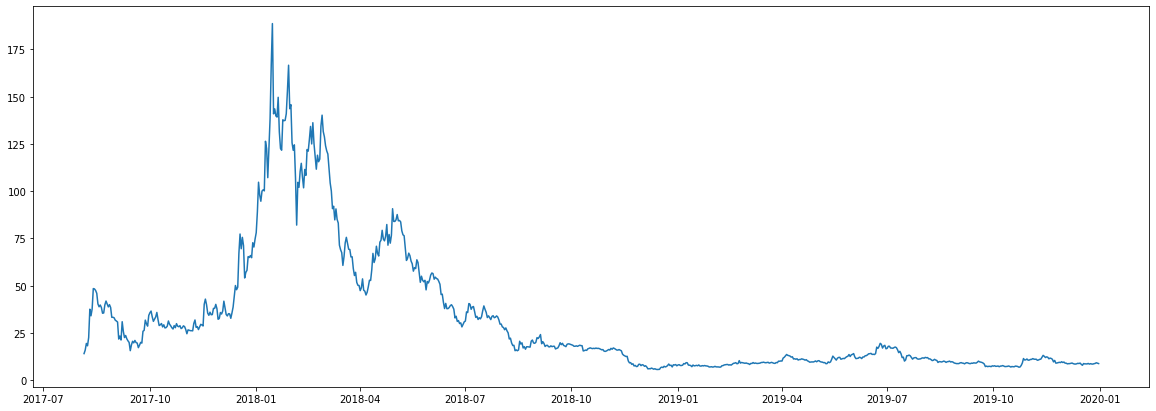

In [0]:
plt.figure(figsize=(20,7))
plt.plot(neo['timestamp'],neo['close'],)

NEO reached its peak in first month of 2018

In [0]:
X = neo.drop(['timestamp','close'],axis=1)
y = neo['close'].copy()

In [0]:
X_transformed = MinMaxScaler().fit_transform(X)

In [0]:
X_transformed = X_transformed.reshape((X_transformed.shape[0],X_transformed.shape[1],1))

In [0]:
neo_lstm = keras.Sequential()

In [0]:
neo_lstm.add(LSTM(64,activation=relu,input_shape=(X.shape[1],1),return_sequences=True))
neo_lstm.add(Dropout(0.5))
neo_lstm.add(LSTM(128,activation=relu))
neo_lstm.add(Dropout(0.5))
neo_lstm.add(Dense(1))

In [0]:
neo_lstm.compile(optimizer='Adam',loss='mae')

In [0]:
X_train,X_test,y_train,y_test = train_test_split(X_transformed,y,test_size=0.3)

In [0]:
neo_lstm.fit(X_train,y_train,epochs=500,validation_data=(X_test,y_test),batch_size=50,
         callbacks=[keras.callbacks.EarlyStopping(patience=20,monitor='val_loss')],shuffle=False)

Train on 615 samples, validate on 264 samples
Epoch 1/500
615/615 [==============================] - 2s 3ms/step - loss: 31.5178 - val_loss: 29.6458
Epoch 2/500
615/615 [==============================] - 0s 418us/step - loss: 30.7012 - val_loss: 26.8543
Epoch 3/500
615/615 [==============================] - 0s 411us/step - loss: 20.6533 - val_loss: 17.0644
Epoch 4/500
615/615 [==============================] - 0s 395us/step - loss: 16.2882 - val_loss: 13.2416
Epoch 5/500
615/615 [==============================] - 0s 401us/step - loss: 14.3404 - val_loss: 11.8862
Epoch 6/500
615/615 [==============================] - 0s 399us/step - loss: 11.7813 - val_loss: 10.4253
Epoch 7/500
615/615 [==============================] - 0s 422us/step - loss: 11.5707 - val_loss: 9.3397
Epoch 8/500
615/615 [==============================] - 0s 490us/step - loss: 10.6141 - val_loss: 8.7273
Epoch 9/500
615/615 [==============================] - 0s 419us/step - loss: 9.8001 - val_loss: 7.4930
Epoch 10/500
61

In [0]:
neo_lstm.fit(X_transformed,y,epochs=100,batch_size=50,verbose=1,
         callbacks=[keras.callbacks.EarlyStopping(patience=20,monitor='loss')],shuffle=False)

Epoch 1/100
879/879 [==============================] - 0s 375us/step - loss: 4.0198
Epoch 2/100
879/879 [==============================] - 0s 361us/step - loss: 6.0786
Epoch 3/100
879/879 [==============================] - 0s 362us/step - loss: 10.4242
Epoch 4/100
879/879 [==============================] - 0s 349us/step - loss: 12.6383
Epoch 5/100
879/879 [==============================] - 0s 358us/step - loss: 19.5582
Epoch 6/100
879/879 [==============================] - 0s 352us/step - loss: 28.4808
Epoch 7/100
879/879 [==============================] - 0s 355us/step - loss: 25.3929
Epoch 8/100
879/879 [==============================] - 0s 370us/step - loss: 24.8736
Epoch 9/100
879/879 [==============================] - 0s 497us/step - loss: 19.7804
Epoch 10/100
879/879 [==============================] - 0s 448us/step - loss: 12.4110
Epoch 11/100
879/879 [==============================] - 0s 400us/step - loss: 8.0648
Epoch 12/100
879/879 [==============================] - 0s 379us/s

Model is now ready to use!

# Ethereum

In [0]:
ethereum.head()

time  close  high     low    open  volumefrom  volumeto  \
0  1438905600   3.00   3.0  0.6747  0.6747      123.93    371.79   
1  1438992000   1.20   3.0  0.1500  3.0000     2119.43   1438.16   
2  1439078400   1.20   1.2  1.2000  1.2000        0.00      0.00   
3  1439164800   1.20   1.2  1.2000  1.2000        0.00      0.00   
4  1439251200   0.99   1.2  0.6504  1.2000     9486.09   7419.73   

            timestamp  
0 2015-08-07 05:00:00  
1 2015-08-08 05:00:00  
2 2015-08-09 05:00:00  
3 2015-08-10 05:00:00  
4 2015-08-11 05:00:00

In [0]:
ethereum.dtypes

time                   int64
close                float64
high                 float64
low                  float64
open                 float64
volumefrom           float64
volumeto             float64
timestamp     datetime64[ns]
dtype: object

In [0]:
ethereum['timestamp'] = pd.to_datetime(ethereum['timestamp'])

In [0]:
ethereum.sort_values(by = 'timestamp',inplace=True)

In [0]:
ethereum.dtypes

time                   int64
close                float64
high                 float64
low                  float64
open                 float64
volumefrom           float64
volumeto             float64
timestamp     datetime64[ns]
dtype: object

In [0]:
plt.figure(figsize=(20,7))
plt.plot(ethereum['timestamp'],ethereum['close'],)

Ethereum reached its peak in 2018

In [0]:
X = ethereum.drop(['timestamp','close'],axis=1)
y = ethereum['close'].copy()

In [0]:
X_transformed = MinMaxScaler().fit_transform(X)

In [0]:
X_transformed = X_transformed.reshape((X_transformed.shape[0],X_transformed.shape[1],1))

In [0]:
ethereum_lstm = keras.Sequential()

In [0]:
ethereum_lstm.add(LSTM(64,activation=relu,input_shape=(X.shape[1],1),return_sequences=True))
ethereum_lstm.add(LSTM(128,activation=relu))
ethereum_lstm.add(Dropout(0.2))
ethereum_lstm.add(Dense(1))

In [0]:
ethereum_lstm.compile(optimizer='Adam',loss='mae')

In [0]:
X_train,X_test,y_train,y_test = train_test_split(X_transformed,y,test_size=0.3)

In [0]:
ethereum_lstm.fit(X_train,y_train,epochs=500,validation_data=(X_test,y_test),batch_size=50,
         callbacks=[keras.callbacks.EarlyStopping(patience=20,monitor='val_loss')],shuffle=False)

Train on 1125 samples, validate on 483 samples
Epoch 1/500
1125/1125 [==============================] - 2s 2ms/step - loss: 198.5791 - val_loss: 211.6295
Epoch 2/500
1125/1125 [==============================] - 0s 443us/step - loss: 174.2041 - val_loss: 99.8820
Epoch 3/500
1125/1125 [==============================] - 0s 423us/step - loss: 87.2907 - val_loss: 71.6735
Epoch 4/500
1125/1125 [==============================] - 0s 411us/step - loss: 72.0317 - val_loss: 62.8311
Epoch 5/500
1125/1125 [==============================] - 1s 461us/step - loss: 65.6934 - val_loss: 52.6806
Epoch 6/500
1125/1125 [==============================] - 1s 611us/step - loss: 58.7779 - val_loss: 43.7195
Epoch 7/500
1125/1125 [==============================] - 1s 481us/step - loss: 48.0179 - val_loss: 31.7939
Epoch 8/500
1125/1125 [==============================] - 1s 482us/step - loss: 34.4087 - val_loss: 22.6573
Epoch 9/500
1125/1125 [==============================] - 1s 449us/step - loss: 23.2473 - val_los

Epoch 77/500
1125/1125 [==============================] - 1s 518us/step - loss: 13.4948 - val_loss: 7.0457
Epoch 78/500
1125/1125 [==============================] - 0s 318us/step - loss: 13.3329 - val_loss: 7.1574
Epoch 79/500
1125/1125 [==============================] - 0s 311us/step - loss: 12.5992 - val_loss: 9.6677
Epoch 80/500
1125/1125 [==============================] - 0s 306us/step - loss: 12.6055 - val_loss: 9.0579
Epoch 81/500
1125/1125 [==============================] - 0s 315us/step - loss: 13.1226 - val_loss: 9.0273
Epoch 82/500
1125/1125 [==============================] - 0s 330us/step - loss: 14.0263 - val_loss: 9.1870
Epoch 83/500
1125/1125 [==============================] - 0s 312us/step - loss: 15.7179 - val_loss: 7.0468
Epoch 84/500
1125/1125 [==============================] - 0s 322us/step - loss: 12.7778 - val_loss: 7.1640
Epoch 85/500
1125/1125 [==============================] - 0s 354us/step - loss: 12.4415 - val_loss: 7.4463
Epoch 86/500
1125/1125 [=============

In [0]:
ethereum_lstm.fit(X_transformed,y,epochs=100,batch_size=50,verbose=1,
         callbacks=[keras.callbacks.EarlyStopping(patience=20,monitor='loss')],shuffle=False)

Epoch 1/100
1608/1608 [==============================] - 0s 297us/step - loss: 16.3355
Epoch 2/100
1608/1608 [==============================] - 0s 282us/step - loss: 26.0909
Epoch 3/100
1608/1608 [==============================] - 0s 286us/step - loss: 122.4579
Epoch 4/100
1608/1608 [==============================] - 0s 285us/step - loss: 127.6604
Epoch 5/100
1608/1608 [==============================] - 0s 295us/step - loss: 53.9068
Epoch 6/100
1608/1608 [==============================] - 0s 290us/step - loss: 34.0220
Epoch 7/100
1608/1608 [==============================] - 0s 272us/step - loss: 58.1656
Epoch 8/100
1608/1608 [==============================] - 0s 301us/step - loss: 50.9063
Epoch 9/100
1608/1608 [==============================] - 0s 274us/step - loss: 52.2439
Epoch 10/100
1608/1608 [==============================] - 0s 278us/step - loss: 18.7542
Epoch 11/100
1608/1608 [==============================] - 0s 295us/step - loss: 30.4378
Epoch 12/100
1608/1608 [===============

Model is now ready to use!

# EOS

In [0]:
eos.head()

time  close    high     low   open  volumefrom     volumeto  \
0  1498694400  0.850  0.9845  0.6000  0.850    15914.71     13984.83   
1  1498780800  0.912  1.9100  0.6500  0.850    24407.23     22117.66   
2  1498867200  1.050  1.3500  0.8000  0.912   113633.80    125944.71   
3  1498953600  3.000  3.8800  0.9455  1.050  3376175.73   7026243.78   
4  1499040000  4.200  6.9000  2.5000  3.000  5163248.87  21951537.56   

            timestamp  
0 2017-06-29 05:00:00  
1 2017-06-30 05:00:00  
2 2017-07-01 05:00:00  
3 2017-07-02 05:00:00  
4 2017-07-03 05:00:00

In [0]:
eos.dtypes

time                   int64
close                float64
high                 float64
low                  float64
open                 float64
volumefrom           float64
volumeto             float64
timestamp     datetime64[ns]
dtype: object

In [0]:
eos['timestamp'] = pd.to_datetime(eos['timestamp'])

In [0]:
eos.sort_values(by = 'timestamp',inplace=True)

In [0]:
eos.dtypes

time                   int64
close                float64
high                 float64
low                  float64
open                 float64
volumefrom           float64
volumeto             float64
timestamp     datetime64[ns]
dtype: object

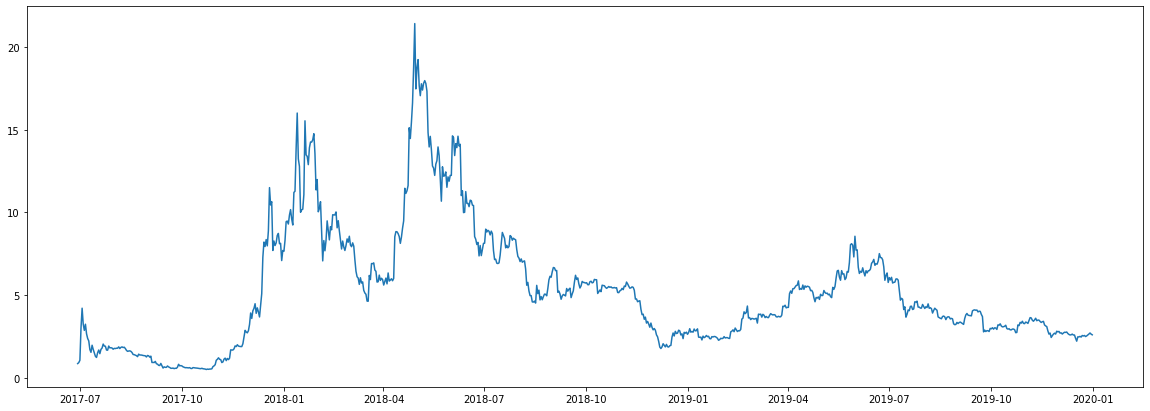

In [0]:
plt.figure(figsize=(20,7))
plt.plot(eos['timestamp'],eos['close'])

EOS reached its peak in fifth month of 2018

In [0]:
X = eos.drop(['timestamp','close'],axis=1)
y = eos['close'].copy()

In [0]:
X_transformed = MinMaxScaler().fit_transform(X)

In [0]:
X_transformed = X_transformed.reshape((X_transformed.shape[0],X_transformed.shape[1],1))

In [0]:
eos_lstm = keras.Sequential()

In [0]:
eos_lstm.add(LSTM(64,activation=relu,input_shape=(X.shape[1],1),return_sequences=True))
eos_lstm.add(LSTM(128,activation=relu))
eos_lstm.add(Dropout(0.2))
eos_lstm.add(Dense(1))

In [0]:
eos_lstm.compile(optimizer='Adam',loss='mae')

In [0]:
X_train,X_test,y_train,y_test = train_test_split(X_transformed,y,test_size=0.3)

In [0]:
eos_lstm.fit(X_train,y_train,epochs=500,validation_data=(X_test,y_test),batch_size=50,
         callbacks=[keras.callbacks.EarlyStopping(patience=20,monitor='val_loss')],shuffle=False)

Train on 641 samples, validate on 275 samples
Epoch 1/500
641/641 [==============================] - 2s 3ms/step - loss: 5.0520 - val_loss: 4.7456
Epoch 2/500
641/641 [==============================] - 0s 325us/step - loss: 4.1735 - val_loss: 2.9023
Epoch 3/500
641/641 [==============================] - 0s 449us/step - loss: 2.3487 - val_loss: 1.9159
Epoch 4/500
641/641 [==============================] - 0s 385us/step - loss: 1.6063 - val_loss: 1.3677
Epoch 5/500
641/641 [==============================] - 0s 413us/step - loss: 1.2880 - val_loss: 1.2151
Epoch 6/500
641/641 [==============================] - 0s 399us/step - loss: 1.1483 - val_loss: 1.1126
Epoch 7/500
641/641 [==============================] - 0s 419us/step - loss: 1.0933 - val_loss: 0.9942
Epoch 8/500
641/641 [==============================] - 0s 370us/step - loss: 1.0219 - val_loss: 0.9068
Epoch 9/500
641/641 [==============================] - 0s 336us/step - loss: 0.8470 - val_loss: 0.7720
Epoch 10/500
641/641 [=======

In [0]:
eos_lstm.fit(X_transformed,y,epochs=100,batch_size=50,verbose=1,
         callbacks=[keras.callbacks.EarlyStopping(patience=20,monitor='loss')],shuffle=False)

Epoch 1/100
916/916 [==============================] - 0s 283us/step - loss: 0.4191
Epoch 2/100
916/916 [==============================] - 0s 280us/step - loss: 0.8350
Epoch 3/100
916/916 [==============================] - 0s 287us/step - loss: 1.7150
Epoch 4/100
916/916 [==============================] - 0s 281us/step - loss: 1.5747
Epoch 5/100
916/916 [==============================] - 0s 290us/step - loss: 0.6961
Epoch 6/100
916/916 [==============================] - 0s 357us/step - loss: 2.2533
Epoch 7/100
916/916 [==============================] - 0s 400us/step - loss: 2.0112
Epoch 8/100
916/916 [==============================] - 0s 327us/step - loss: 1.8591
Epoch 9/100
916/916 [==============================] - 0s 317us/step - loss: 0.8271
Epoch 10/100
916/916 [==============================] - 0s 337us/step - loss: 0.5866
Epoch 11/100
916/916 [==============================] - 0s 373us/step - loss: 0.5121
Epoch 12/100
916/916 [==============================] - 0s 322us/step - lo

Model is now ready to use!

# Litecoin

In [0]:
litecoin.head()

time  close  high  low  open  volumefrom  volumeto  \
0  1382572800    3.0   3.0  3.0   3.0       2.707      8.12   
1  1382659200    3.0   3.0  3.0   3.0       0.000      0.00   
2  1382745600    3.0   3.0  3.0   3.0       0.000      0.00   
3  1382832000    3.0   3.0  3.0   3.0       0.000      0.00   
4  1382918400    3.0   3.0  3.0   3.0       0.000      0.00   

            timestamp  
0 2013-10-24 05:00:00  
1 2013-10-25 05:00:00  
2 2013-10-26 05:00:00  
3 2013-10-27 05:00:00  
4 2013-10-28 05:00:00

In [0]:
litecoin.dtypes

time                   int64
close                float64
high                 float64
low                  float64
open                 float64
volumefrom           float64
volumeto             float64
timestamp     datetime64[ns]
dtype: object

In [0]:
litecoin['timestamp'] = pd.to_datetime(litecoin['timestamp'])

In [0]:
litecoin.sort_values(by = 'timestamp',inplace=True)

In [0]:
litecoin.dtypes

time                   int64
close                float64
high                 float64
low                  float64
open                 float64
volumefrom           float64
volumeto             float64
timestamp     datetime64[ns]
dtype: object

In [0]:
plt.figure(figsize=(20,7))
plt.plot(litecoin['timestamp'],litecoin['close'])

Litecoin reached its peak in 2018

In [0]:
X = litecoin.drop(['timestamp','close'],axis=1)
y = litecoin['close'].copy()

In [0]:
X_transformed = MinMaxScaler().fit_transform(X)

In [0]:
X_transformed = X_transformed.reshape((X_transformed.shape[0],X_transformed.shape[1],1))

In [0]:
litecoin_lstm = keras.Sequential()

In [0]:
litecoin_lstm.add(LSTM(64,activation=relu,input_shape=(X.shape[1],1),return_sequences=True))
litecoin_lstm.add(LSTM(128,activation=relu))
litecoin_lstm.add(Dropout(0.2))
litecoin_lstm.add(Dense(1))

In [0]:
litecoin_lstm.compile(optimizer='Adam',loss='mae')

In [0]:
X_train,X_test,y_train,y_test = train_test_split(X_transformed,y,test_size=0.3)

In [0]:
litecoin_lstm.fit(X_train,y_train,epochs=500,validation_data=(X_test,y_test),batch_size=50,
         callbacks=[keras.callbacks.EarlyStopping(patience=20,monitor='val_loss')],shuffle=False)

Train on 1582 samples, validate on 678 samples
Epoch 1/500
1582/1582 [==============================] - 2s 1ms/step - loss: 38.2788 - val_loss: 28.3567
Epoch 2/500
1582/1582 [==============================] - 1s 322us/step - loss: 13.5770 - val_loss: 10.3241
Epoch 3/500
1582/1582 [==============================] - 1s 316us/step - loss: 9.7249 - val_loss: 8.6070
Epoch 4/500
1582/1582 [==============================] - 1s 339us/step - loss: 8.7247 - val_loss: 8.0383
Epoch 5/500
1582/1582 [==============================] - 0s 313us/step - loss: 8.4253 - val_loss: 7.4897
Epoch 6/500
1582/1582 [==============================] - 1s 323us/step - loss: 8.1496 - val_loss: 6.6613
Epoch 7/500
1582/1582 [==============================] - 0s 308us/step - loss: 7.6996 - val_loss: 6.0924
Epoch 8/500
1582/1582 [==============================] - 0s 309us/step - loss: 7.3167 - val_loss: 5.5735
Epoch 9/500
1582/1582 [==============================] - 1s 333us/step - loss: 6.2822 - val_loss: 6.7839
Epoch 

Epoch 78/500
1582/1582 [==============================] - 1s 412us/step - loss: 2.6049 - val_loss: 2.1681
Epoch 79/500
1582/1582 [==============================] - 1s 400us/step - loss: 2.9116 - val_loss: 2.1837
Epoch 80/500
1582/1582 [==============================] - 1s 411us/step - loss: 2.6423 - val_loss: 1.6657
Epoch 81/500
1582/1582 [==============================] - 1s 402us/step - loss: 2.3306 - val_loss: 1.2534
Epoch 82/500
1582/1582 [==============================] - 1s 408us/step - loss: 2.3868 - val_loss: 1.4344
Epoch 83/500
1582/1582 [==============================] - 1s 497us/step - loss: 2.6656 - val_loss: 1.5425
Epoch 84/500
1582/1582 [==============================] - 1s 614us/step - loss: 2.7650 - val_loss: 2.8733
Epoch 85/500
1582/1582 [==============================] - 1s 523us/step - loss: 2.7871 - val_loss: 1.9147
Epoch 86/500
1582/1582 [==============================] - 1s 655us/step - loss: 2.5321 - val_loss: 1.2853
Epoch 87/500
1582/1582 [======================

In [0]:
litecoin_lstm.fit(X_transformed,y,epochs=100,batch_size=50,verbose=1,
         callbacks=[keras.callbacks.EarlyStopping(patience=20,monitor='loss')],shuffle=False)

Epoch 1/100
2260/2260 [==============================] - 1s 294us/step - loss: 5.1244
Epoch 2/100
2260/2260 [==============================] - 1s 287us/step - loss: 20.9785
Epoch 3/100
2260/2260 [==============================] - 1s 286us/step - loss: 19.3012
Epoch 4/100
2260/2260 [==============================] - 1s 394us/step - loss: 19.5118
Epoch 5/100
2260/2260 [==============================] - 1s 434us/step - loss: 24.7043
Epoch 6/100
2260/2260 [==============================] - 1s 366us/step - loss: 11.7954
Epoch 7/100
2260/2260 [==============================] - 1s 308us/step - loss: 11.2931
Epoch 8/100
2260/2260 [==============================] - 1s 274us/step - loss: 6.8751
Epoch 9/100
2260/2260 [==============================] - 1s 310us/step - loss: 6.3148
Epoch 10/100
2260/2260 [==============================] - 1s 300us/step - loss: 4.3964
Epoch 11/100
2260/2260 [==============================] - 1s 400us/step - loss: 4.1276
Epoch 12/100
2260/2260 [======================

Model is now ready to use!

# Predicting Future Data

Now we are going to predict the data of 2020 from Janurary 1 to March 15. and we will compare it with actual results and lets see how much good our model has performed!

## Bitcoin

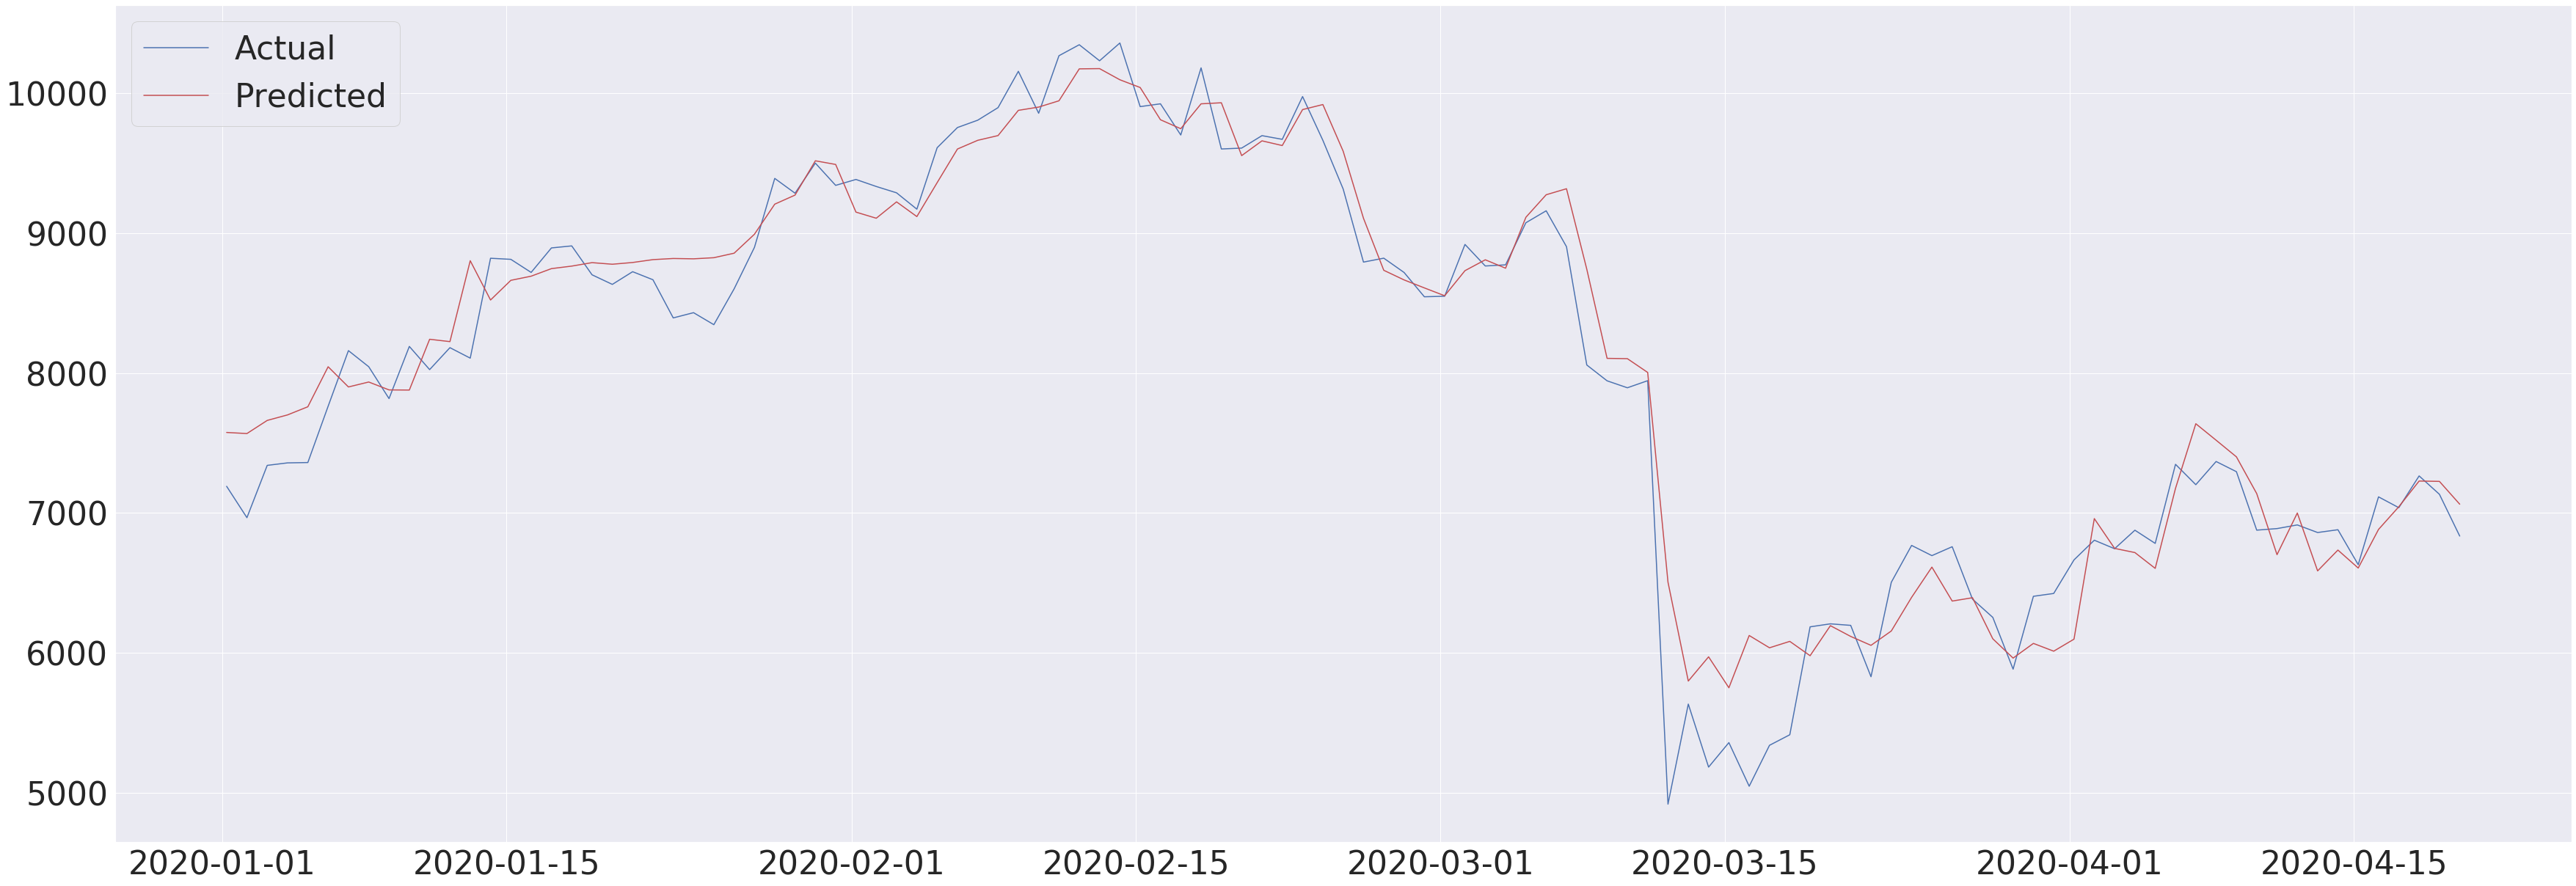

In [0]:
X = bitcoin_social.drop(['timestamp','close'],axis=1)

X_transformed = MinMaxScaler().fit_transform(X)
X_transformed = X_transformed.reshape((X_transformed.shape[0],X_transformed.shape[1],1))
_y = bitcoin_social['close']
bitcoin_lstm.fit(X_transformed,_y,verbose=0,epochs=100)

y_hat = pd.DataFrame(bitcoin_lstm.predict(X_transformed))

plt.figure(figsize=(60,21))
sns.set(style="ticks", rc={"lines.linewidth": 5})
sns.set(font_scale=4)
plt.plot(bitcoin_social['timestamp'],bitcoin_social['close'],'-b',label='Actual')
plt.plot(bitcoin_social['timestamp'],y_hat[0],'-r',label='Predicted')
plt.legend(loc="upper left")
plt.show()

<font color='dark_orange'>Orange Line</font> is predicted closing 

<font color='blue'>Blue Line</font> is actual closing

The results are good but not very well, why? because the close prices of bitcoins are fluctuating alot, as this can be seen in training data, however after time passes, our predictions were comming close to actual ones.

## Chainlink

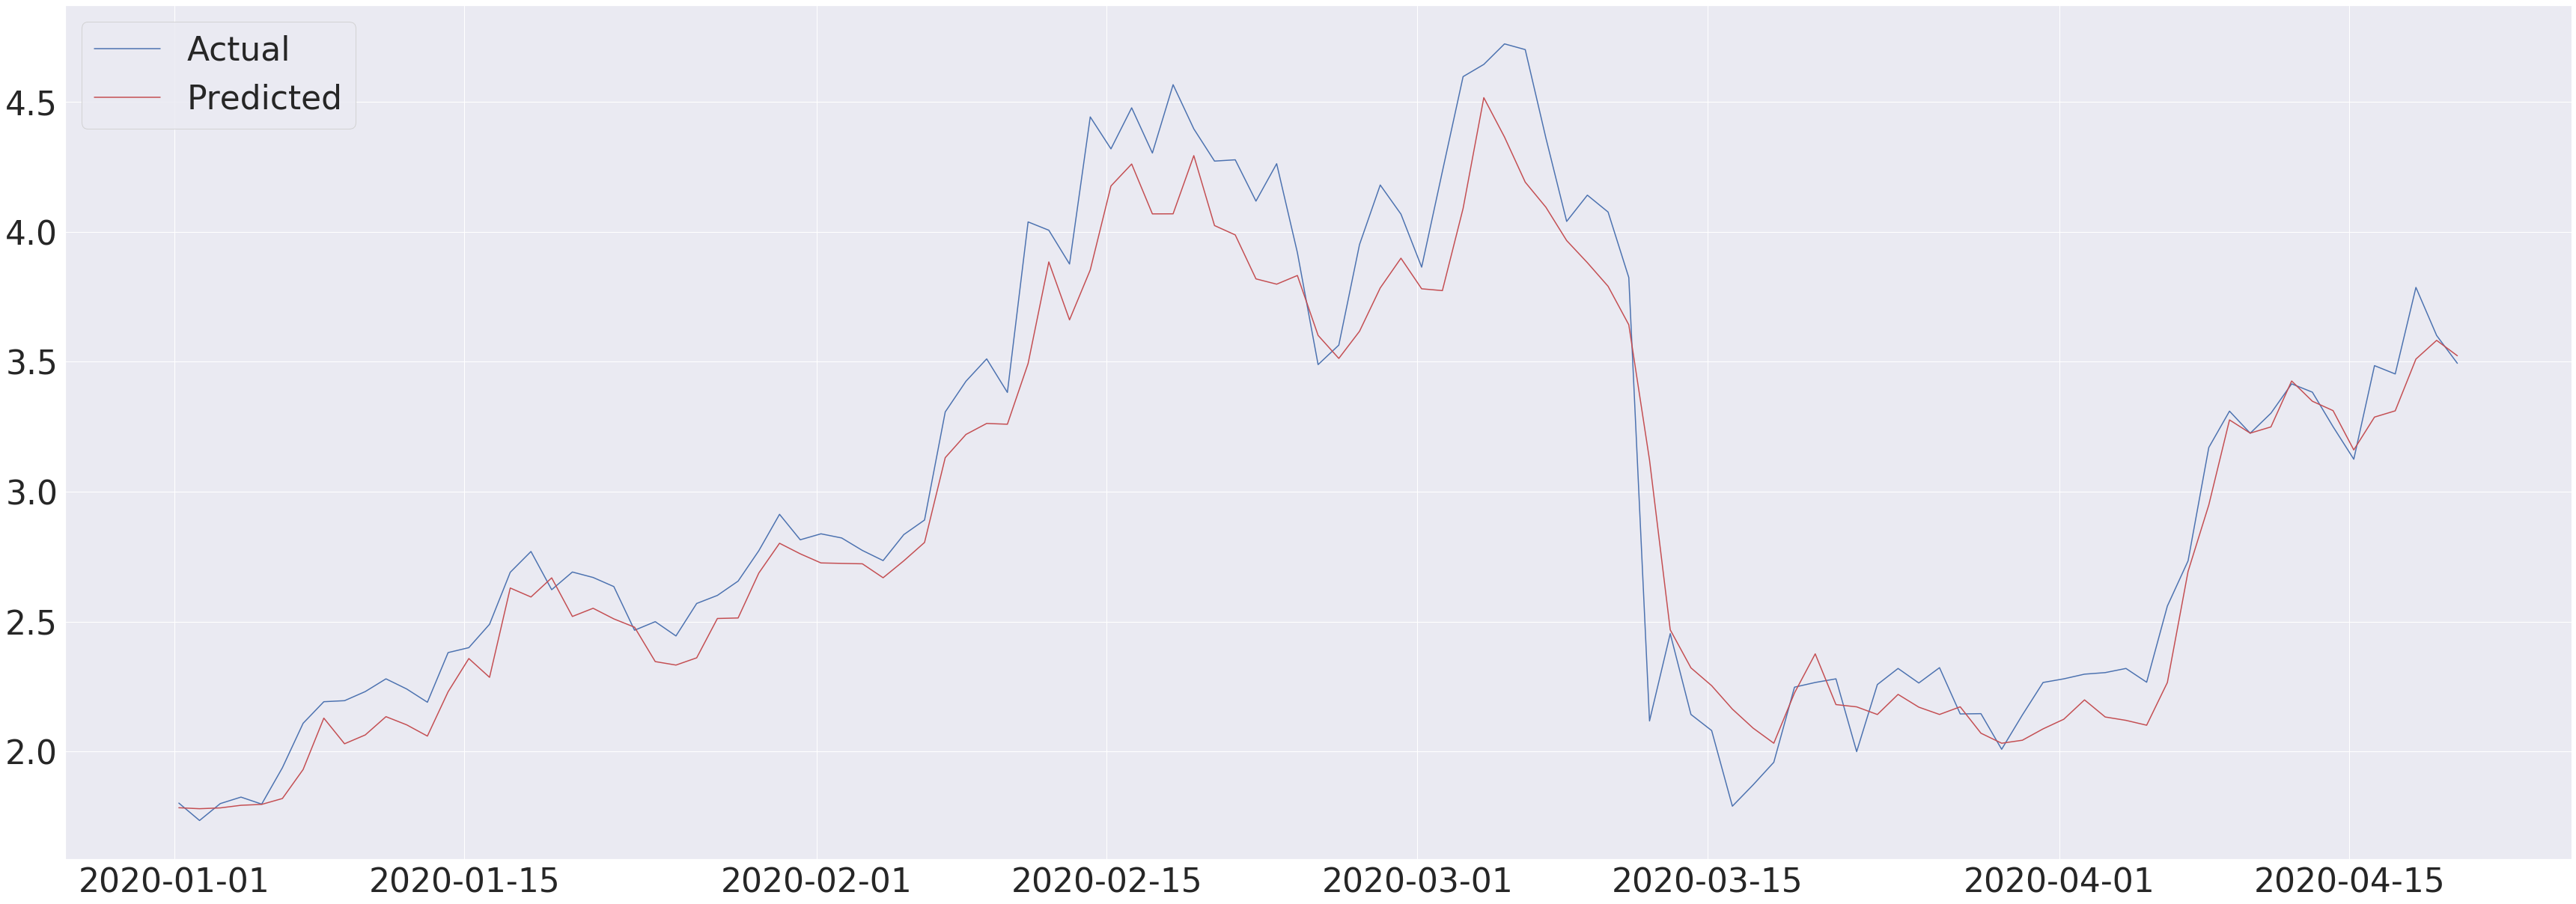

In [0]:
X = chainlink_social.drop(['timestamp','close'],axis=1)

X_transformed = MinMaxScaler().fit_transform(X)
X_transformed = X_transformed.reshape((X_transformed.shape[0],X_transformed.shape[1],1))
_y = chainlink_social['close']
chainlink_lstm.fit(X_transformed,_y,verbose=0,epochs=100)

y_hat = pd.DataFrame(chainlink_lstm.predict(X_transformed))

plt.figure(figsize=(60,21))
sns.set(style="ticks", rc={"lines.linewidth": 5})
sns.set(font_scale=4)

plt.plot(chainlink_social['timestamp'],chainlink_social['close'],'-b',label='Actual')
plt.plot(chainlink_social['timestamp'],y_hat[0],'-r',label='Predicted')
plt.legend(loc="upper left")
plt.show()

<font color='dark_orange'>Orange Line</font> is predicted closing 

<font color='blue'>Blue Line</font> is actual closing

The difference is of only 1.5 unit and our prediction is pretty much following the actual link pattern.!

## Dash

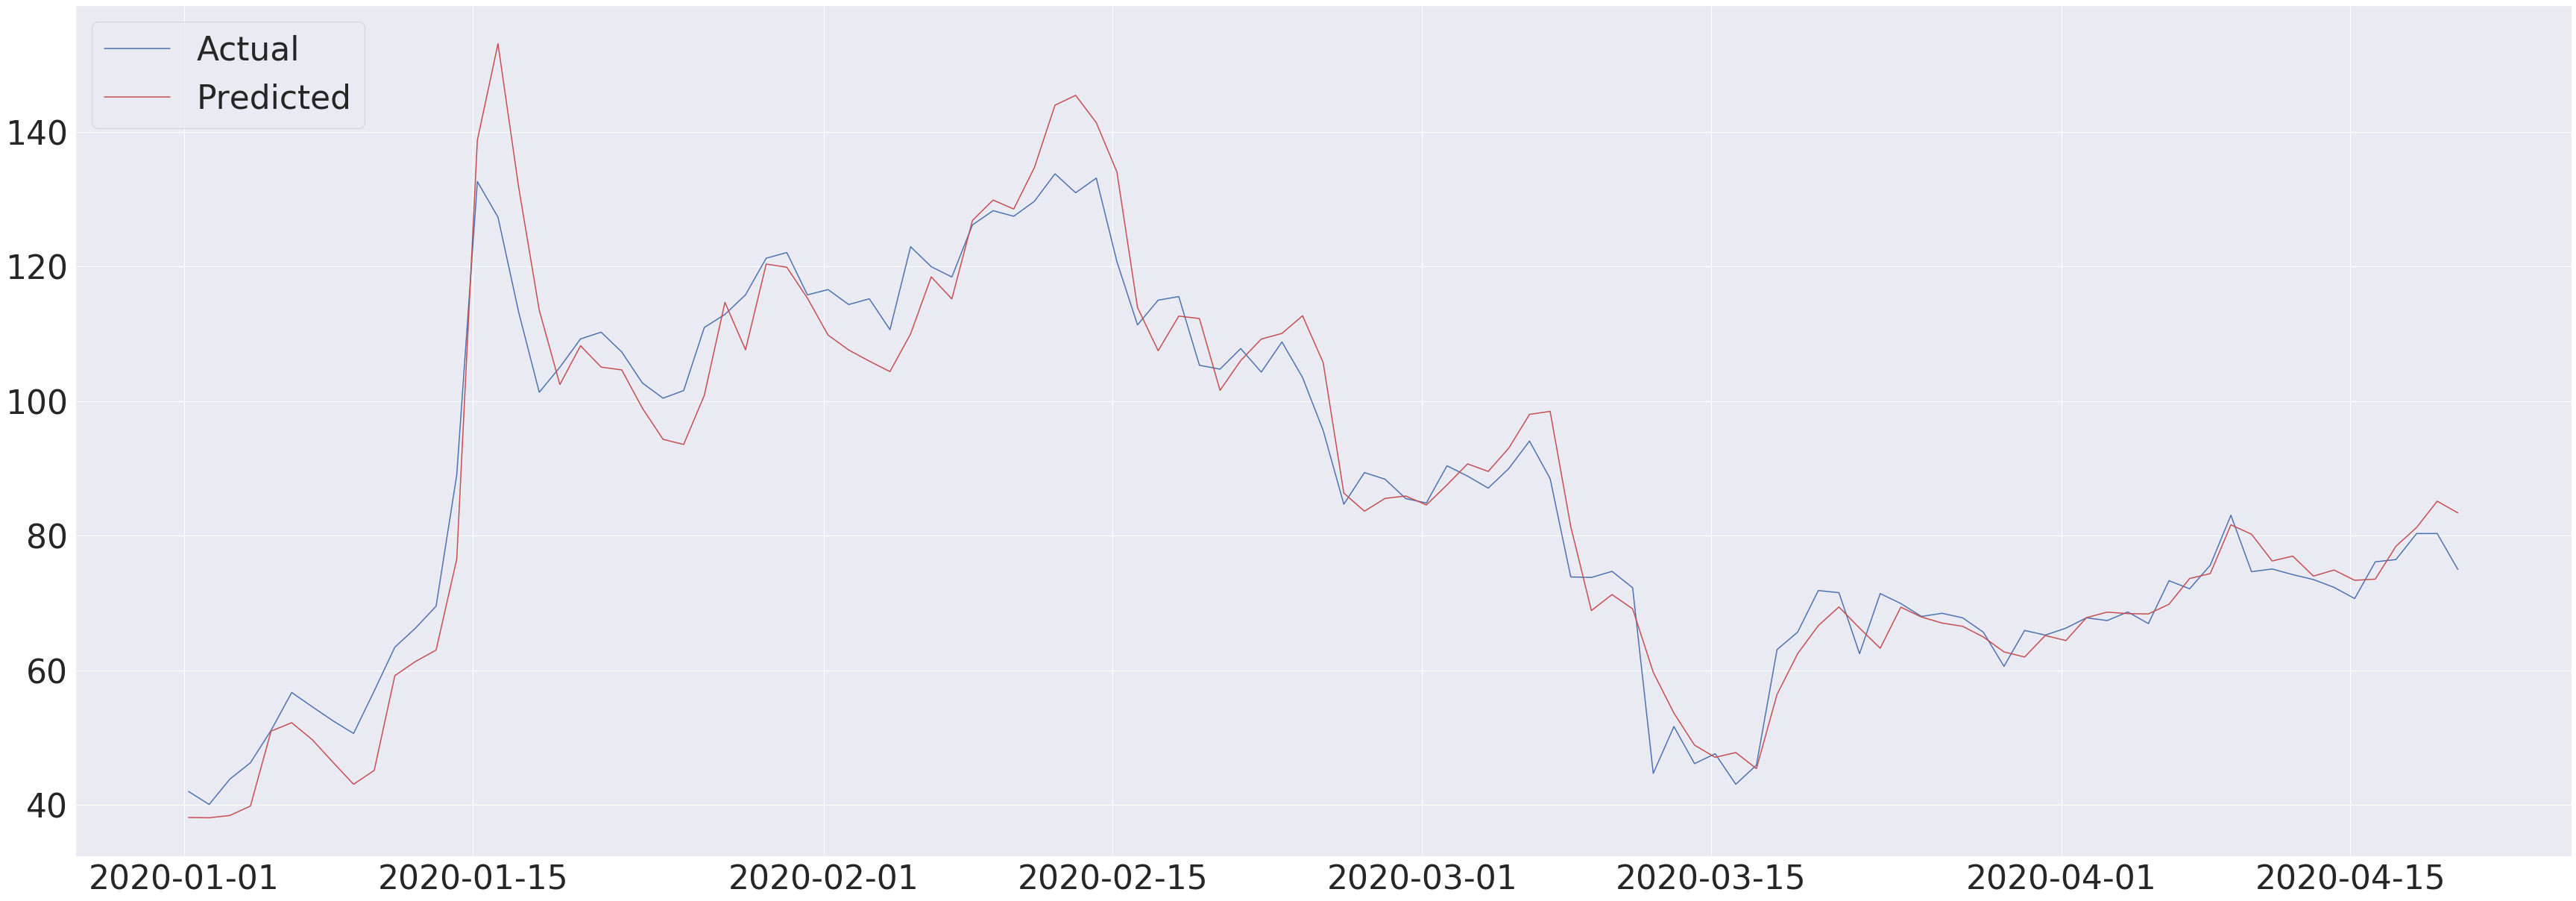

In [0]:
X = dash_social.drop(['timestamp','close'],axis=1)

X_transformed = MinMaxScaler().fit_transform(X)
X_transformed = X_transformed.reshape((X_transformed.shape[0],X_transformed.shape[1],1))
_y = dash_social['close']
dash_lstm.fit(X_transformed,_y,verbose=0,epochs=100)

y_hat = pd.DataFrame(dash_lstm.predict(X_transformed))

plt.figure(figsize=(60,21))
sns.set(style="ticks", rc={"lines.linewidth": 5})
sns.set(font_scale=4)

plt.plot(dash_social['timestamp'],dash_social['close'],'-b',label='Actual')
plt.plot(dash_social['timestamp'],y_hat[0],'-r',label='Predicted')
plt.legend(loc="upper left")
plt.show()

<font color='dark_orange'>Orange Line</font> is predicted closing 

<font color='blue'>Blue Line</font> is actual closing

Our prediction link overfitted a bit due to unexpected flutuations in training data but returned to actual prices very soon

## XRP

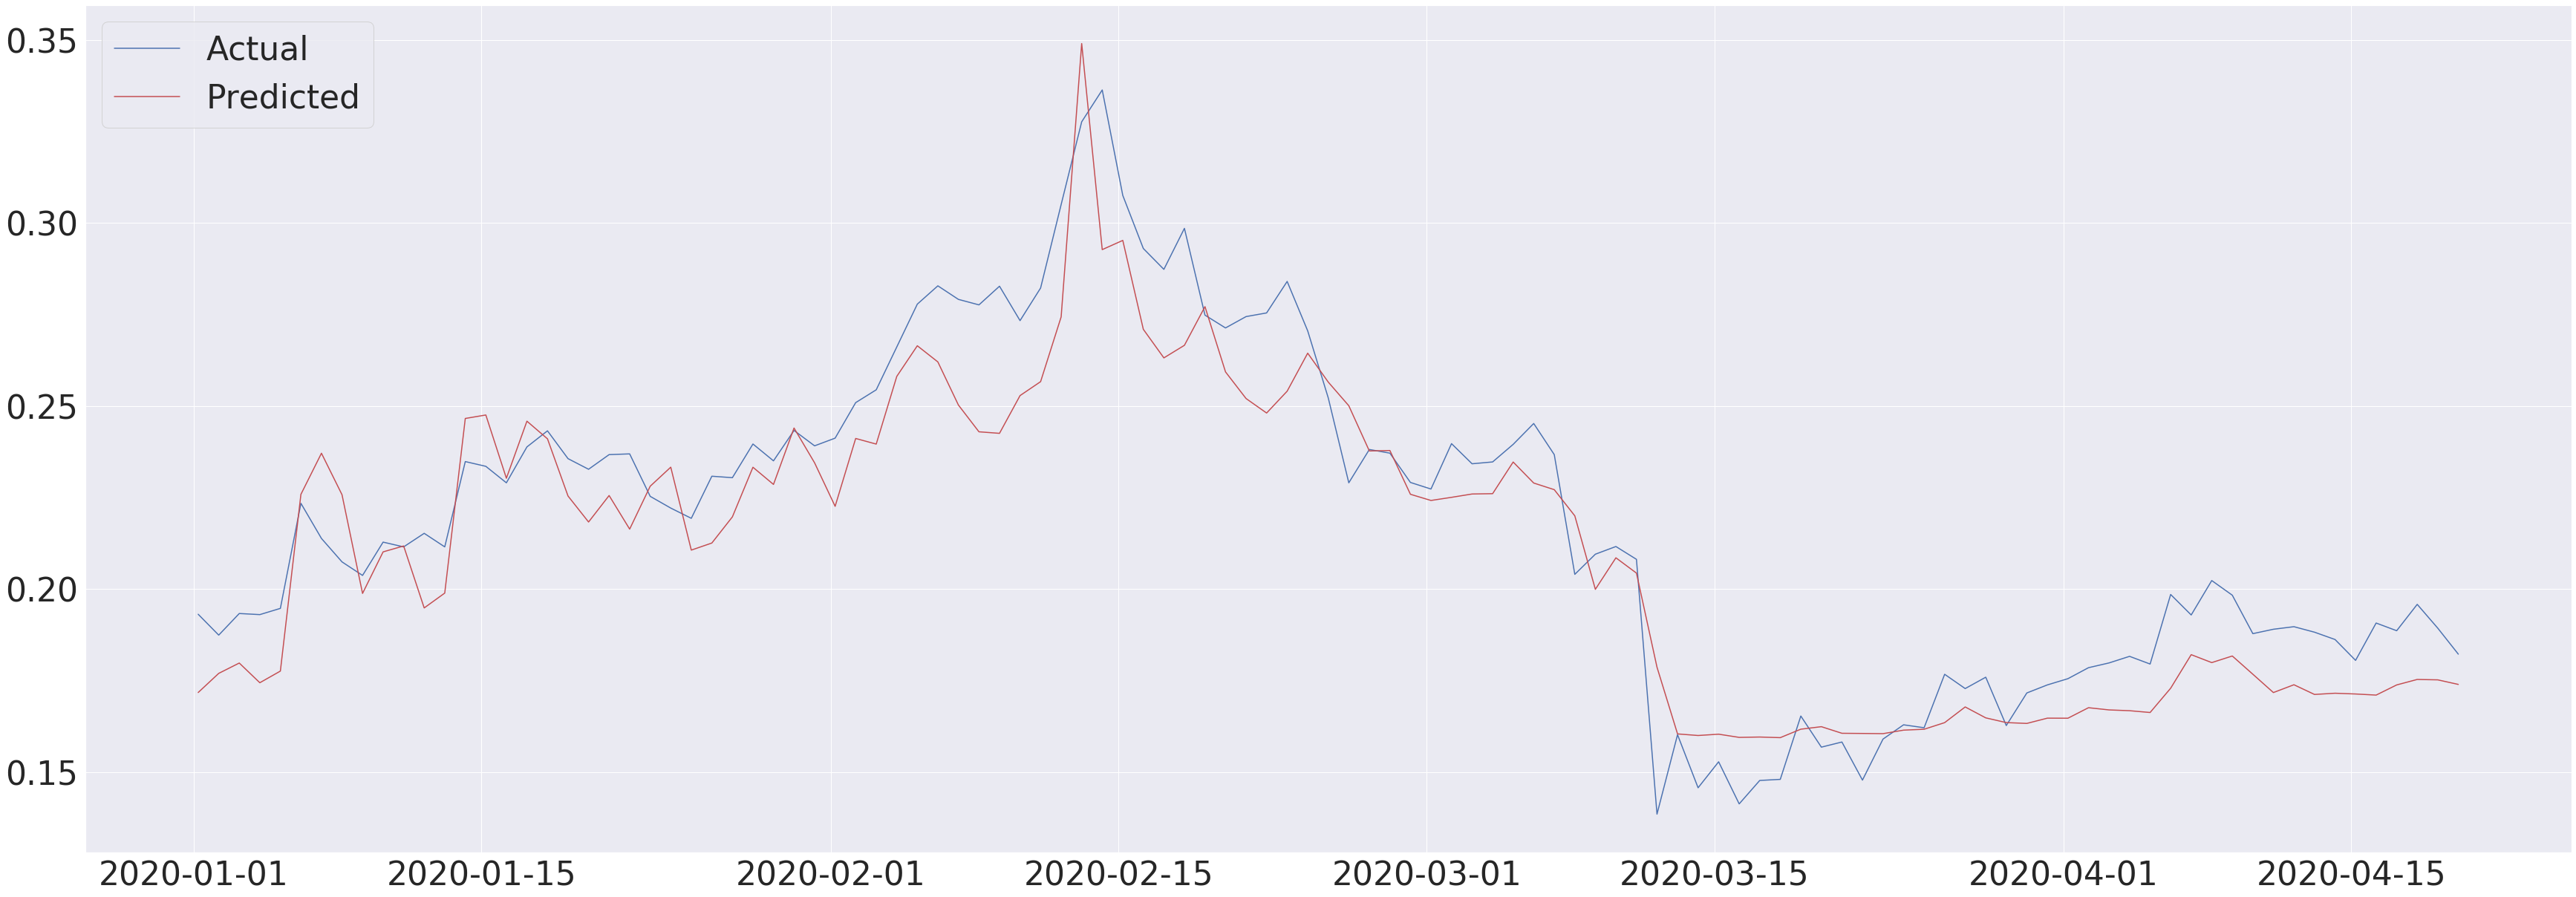

In [0]:
X = xrp_social.drop(['timestamp','close'],axis=1)

X_transformed = MinMaxScaler().fit_transform(X)
X_transformed = X_transformed.reshape((X_transformed.shape[0],X_transformed.shape[1],1))
_y = xrp_social['close']
xrp_lstm.fit(X_transformed,_y,verbose=0,epochs=100)

y_hat = pd.DataFrame(xrp_lstm.predict(X_transformed))

plt.figure(figsize=(60,21))
sns.set(style="ticks", rc={"lines.linewidth": 5})
sns.set(font_scale=4)

plt.plot(xrp_social['timestamp'],xrp_social['close'],'-b',label='Actual')
plt.plot(xrp_social['timestamp'],y_hat[0],'-r',label='Predicted')
plt.legend(loc="upper left")
plt.show()

<font color='dark_orange'>Orange Line</font> is predicted closing 

<font color='blue'>Blue Line</font> is actual closing

Our results are almost some except there are few difference of 0.4 in the month of febuary

## NEO

In [0]:
X = neo_social.drop(['timestamp','close'],axis=1)

X_transformed = MinMaxScaler().fit_transform(X)
X_transformed = X_transformed.reshape((X_transformed.shape[0],X_transformed.shape[1],1))
_y = neo_social['close']
neo_lstm.fit(X_transformed,_y,verbose=0,epochs=100)

y_hat = pd.DataFrame(neo_lstm.predict(X_transformed))

plt.figure(figsize=(60,21))
sns.set(style="ticks", rc={"lines.linewidth": 5})
sns.set(font_scale=4)

plt.plot(neo_social['timestamp'],neo_social['close'],'-b',label='Actual')
plt.plot(neo_social['timestamp'],y_hat[0],'-r',label='Predicted')
plt.legend(loc="upper left")
plt.show()

<font color='dark_orange'>Orange Line</font> is predicted closing 

<font color='blue'>Blue Line</font> is actual closing

As training data in past dates, 2018 was the year where it saw unexpected growth, so it expected the same in this year too.

## Ethereum

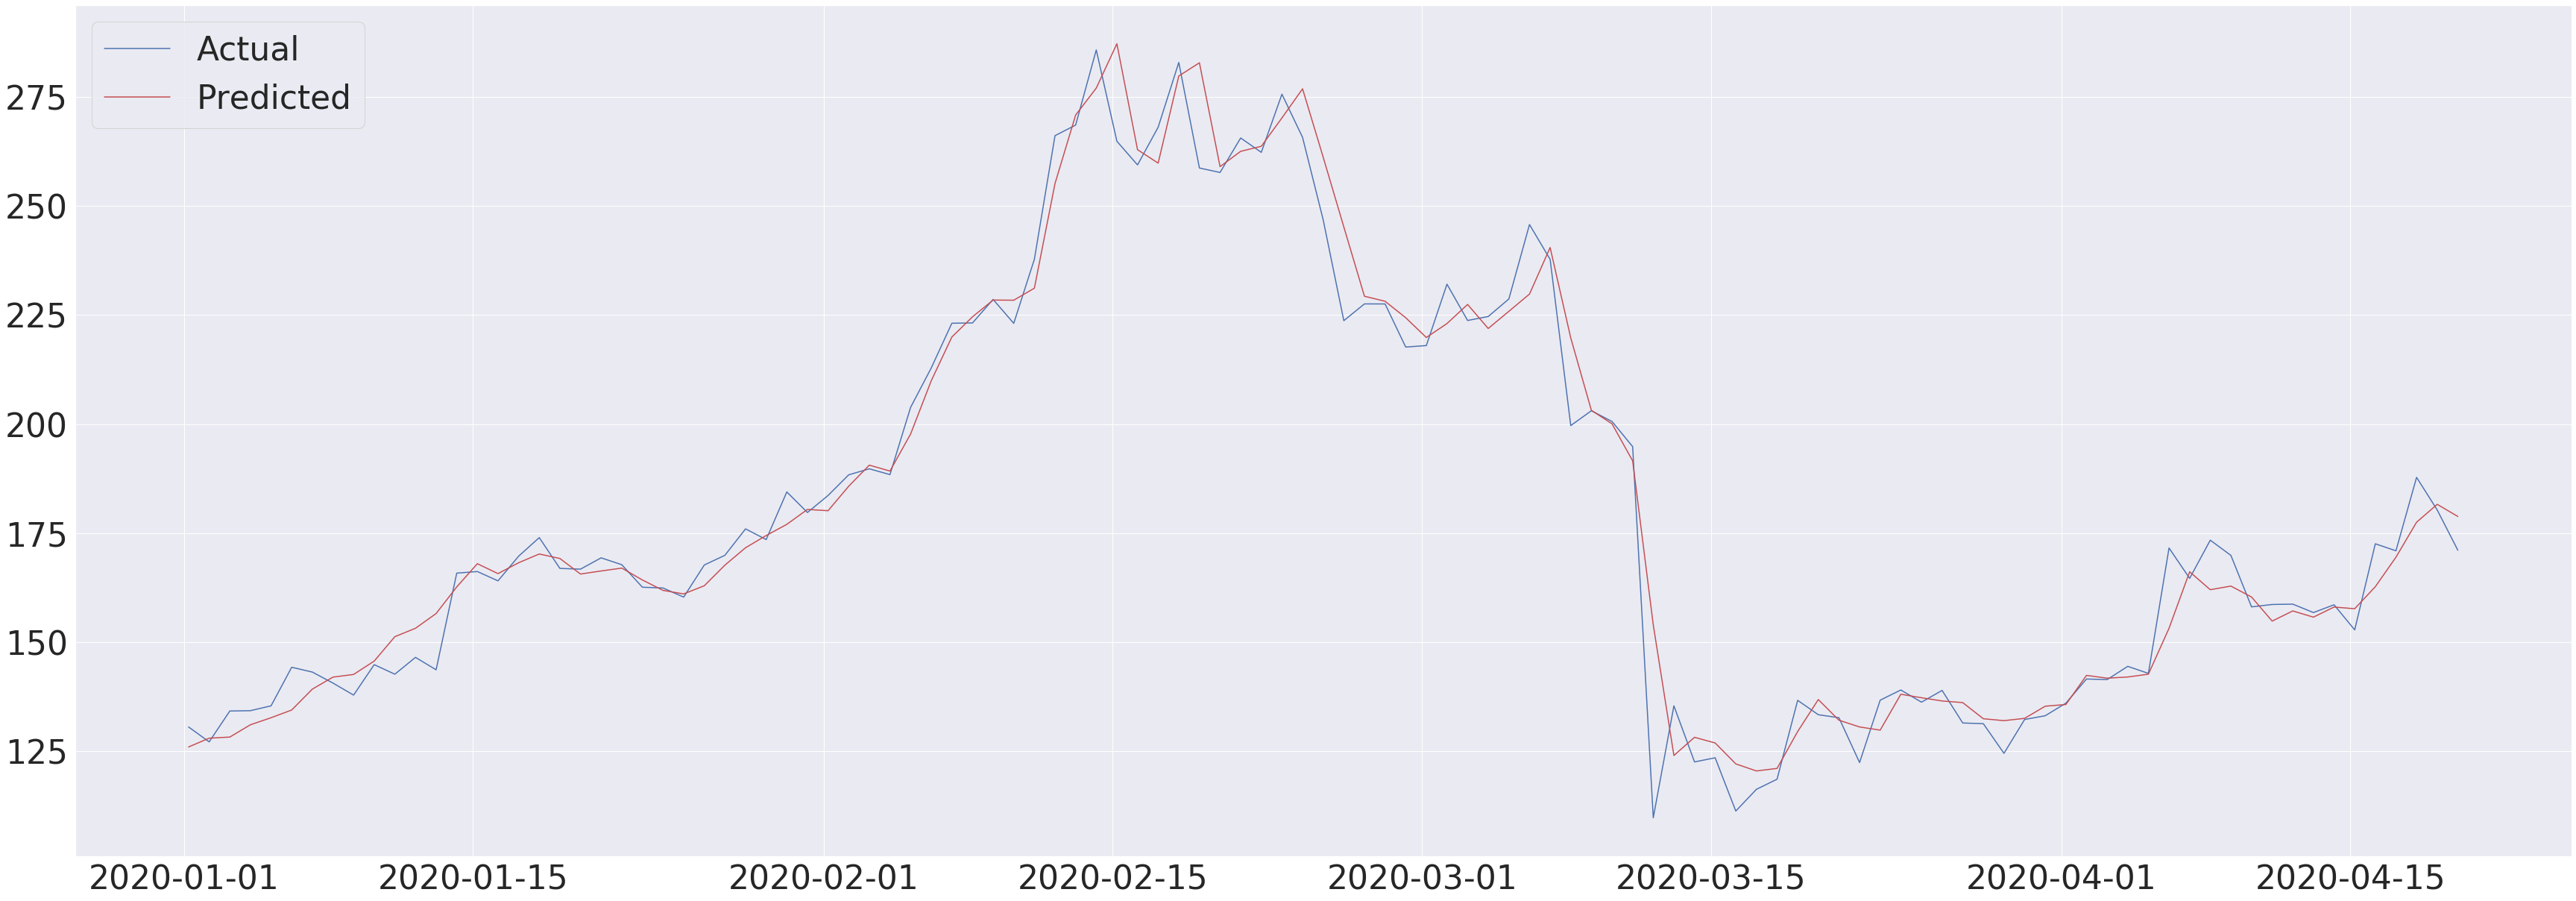

In [0]:
X = ethereum_social.drop(['timestamp','close'],axis=1)

X_transformed = MinMaxScaler().fit_transform(X)
X_transformed = X_transformed.reshape((X_transformed.shape[0],X_transformed.shape[1],1))
_y = ethereum_social['close']
ethereum_lstm.fit(X_transformed,_y,verbose=0,epochs=100)

y_hat = pd.DataFrame(ethereum_lstm.predict(X_transformed))

plt.figure(figsize=(60,21))
sns.set(style="ticks", rc={"lines.linewidth": 5})
sns.set(font_scale=4)

plt.plot(ethereum_social['timestamp'],ethereum_social['close'],'-b',label='Actual')
plt.plot(ethereum_social['timestamp'],y_hat[0],'-r',label='Predicted')
plt.legend(loc="upper left")
plt.show()

<font color='dark_orange'>Orange Line</font> is predicted closing 

<font color='blue'>Blue Line</font> is actual closing

Almost identical, just few difference

## EOS

In [0]:
X = eos_social.drop(['timestamp','close'],axis=1)

X_transformed = MinMaxScaler().fit_transform(X)
X_transformed = X_transformed.reshape((X_transformed.shape[0],X_transformed.shape[1],1))
_y = eos_social['close']
eos_lstm.fit(X_transformed,_y,verbose=0,epochs=100)

y_hat = pd.DataFrame(eos_lstm.predict(X_transformed))

plt.figure(figsize=(60,21))
sns.set(style="ticks", rc={"lines.linewidth": 5})
sns.set(font_scale=4)

plt.plot(eos_social['timestamp'],eos_social['close'],'-b',label='Actual')
plt.plot(eos_social['timestamp'],y_hat[0],'-r',label='Predicted')
plt.legend(loc="upper left")
plt.show()

<font color='dark_orange'>Orange Line</font> is predicted closing 

<font color='blue'>Blue Line</font> is actual closing

## Litecoin

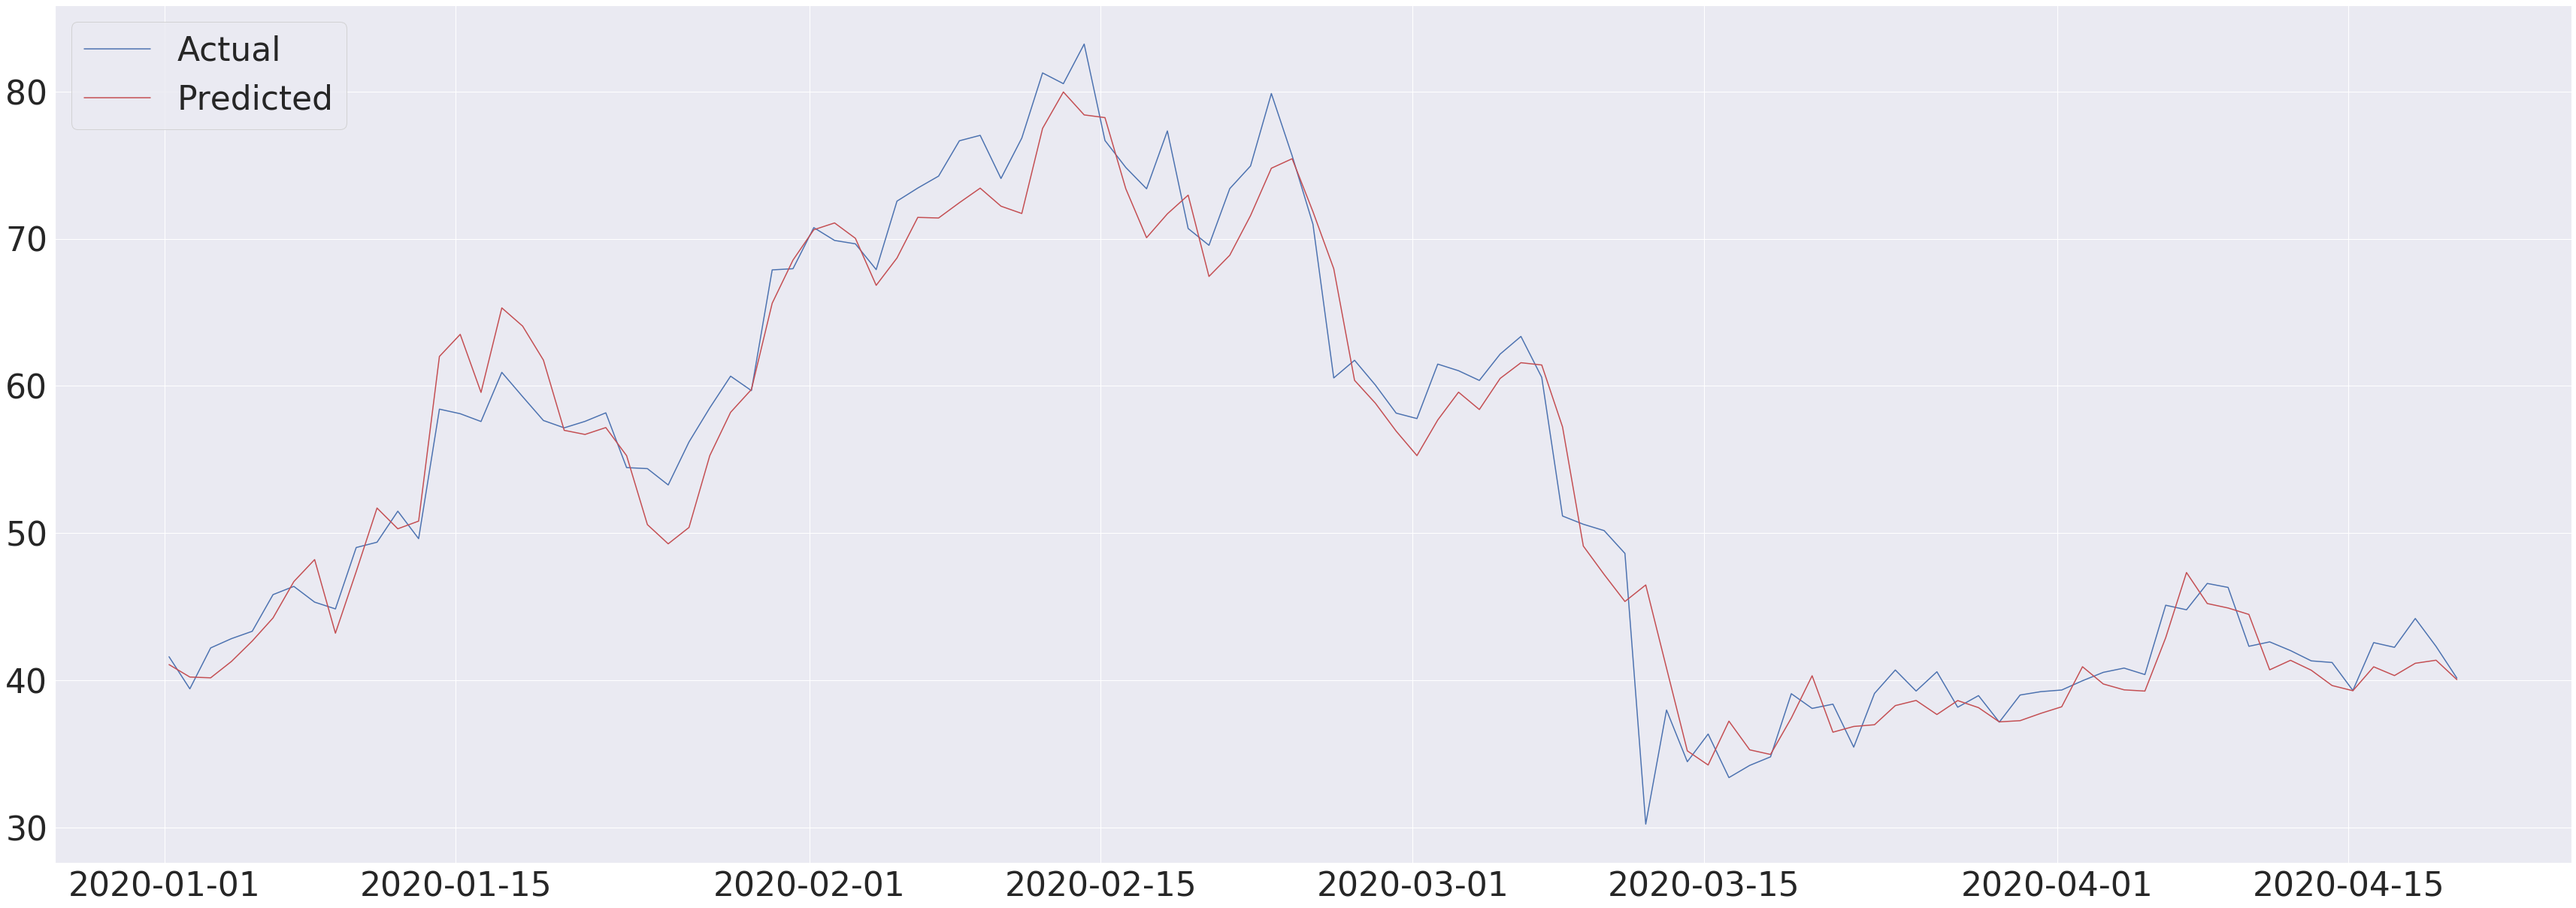

In [0]:
X = litecoin_social.drop(['timestamp','close'],axis=1)

X_transformed = MinMaxScaler().fit_transform(X)
X_transformed = X_transformed.reshape((X_transformed.shape[0],X_transformed.shape[1],1))
_y = litecoin_social['close']
litecoin_lstm.fit(X_transformed,_y,verbose=0,epochs=100)

y_hat = pd.DataFrame(litecoin_lstm.predict(X_transformed))

plt.figure(figsize=(60,21))
sns.set(style="ticks", rc={"lines.linewidth": 5})
sns.set(font_scale=4)

plt.plot(litecoin_social['timestamp'],litecoin_social['close'],'-b',label='Actual')
plt.plot(litecoin_social['timestamp'],y_hat[0],'-r',label='Predicted')
plt.legend(loc="upper left")
plt.show()

<font color='dark_orange'>Orange Line</font> is predicted closing 

<font color='blue'>Blue Line</font> is actual closing

The think to notice is, our prediction line suddenly grows in the middle of graph and in other times its very similar to actual one, why is that? because in training data, in all of these currencies, 2018 was the year where the growth was too much so our models expected the same growth in this year too. 
as we get more data and feed the data to our models, they will overcome this issue.

# Predicting Future

Here we will generate future data using previous data and then predict for each year.

You can increase future years from below argument

In [0]:
future_Time = 1 # increase this, to increase the future years

# Bitcoin

In [0]:
new_d = pd.DataFrame([])
new_data = bitcoin[bitcoin['timestamp'].dt.year == 2018].drop(['timestamp'],axis=1).copy()
j = future_Time
while j > 0 :
    new_data = TimeseriesGenerator(np.array(new_data),np.array(new_data),length=6,batch_size=100)
    for i in range(len(new_data)):
        x,y = new_data[i]
        new_d = new_d.append(list(y))
    
    new_data = new_d.copy()
    j = j - 1
    
new_d.reset_index(inplace=True)
new_d.drop(['index'],axis=1,inplace=True)
new_d.columns = list(bitcoin.drop(['timestamp'],axis=1).columns)

cur_date = cur_date = pd.to_datetime('2020-03-16',format='%Y-%m-%d')
for i in range(0,new_d.shape[0]):
    new_d.at[i,'timestamp'] = cur_date
    cur_date = cur_date + pd.to_timedelta(1,unit='d')
    
new_d = new_d[bitcoin.columns]
new_d = pd.concat([new_d,bitcoin_social],axis=0)
new_d.sort_values(by='timestamp',inplace=True)
new_d = new_d[new_d['timestamp'].dt.year == 2020]
new_d.reset_index(inplace=True,drop=True)

In [0]:
new_d['timestamp'] = pd.to_datetime(new_d['timestamp'])
new_d.sort_values(by = 'timestamp',inplace=True)

In [0]:
X = new_d.drop(['timestamp','close'],axis=1)
y = new_d['close'].copy()

In [0]:
X_transformed = MinMaxScaler().fit_transform(X)

In [0]:
X_transformed = X_transformed.reshape((X_transformed.shape[0],X_transformed.shape[1],1))

In [0]:
results = bitcoin_lstm.predict(X_transformed)

In [0]:
plt.figure(figsize=(80,51))
plt.plot(new_d['timestamp'],results,'-r',linewidth = 4,label = 'Prediction')
plt.legend(loc="upper right")

# Chainlink

In [0]:
new_d = pd.DataFrame([])
new_data = chainlink[chainlink['timestamp'].dt.year==2019].drop(['timestamp'],axis=1).copy()
j = future_Time
while j > 0 :
    new_data = TimeseriesGenerator(np.array(new_data),np.array(new_data),length=6)
    for i in range(len(new_data)):
        x,y = new_data[i]
        new_d = new_d.append(list(y))
    
    new_data = new_d.copy()
    j = j - 1
    
new_d.reset_index(inplace=True)
new_d.drop(['index'],axis=1,inplace=True)
new_d.columns = list(chainlink.drop(['timestamp'],axis=1).columns)

cur_date = cur_date = pd.to_datetime('2020-03-16',format='%Y-%m-%d')
for i in range(0,new_d.shape[0]):
    new_d.at[i,'timestamp'] = cur_date
    cur_date = cur_date + pd.to_timedelta(1,unit='d')
    
new_d = new_d[chainlink.columns]
new_d = new_d[chainlink.columns]
new_d = pd.concat([new_d,chainlink_social],axis=0)
new_d.sort_values(by='timestamp',inplace=True)
new_d = new_d[new_d['timestamp'].dt.year == 2020]
new_d.reset_index(inplace=True,drop=True)

In [0]:
new_d['timestamp'] = pd.to_datetime(new_d['timestamp'])
new_d.sort_values(by = 'timestamp',inplace=True)

Bitcoins reached its peak in 2018

In [0]:
X = new_d.drop(['timestamp','close'],axis=1)
y = new_d['close'].copy()

In [0]:
X_transformed = MinMaxScaler().fit_transform(X)

In [0]:
X_transformed = X_transformed.reshape((X_transformed.shape[0],X_transformed.shape[1],1))

In [0]:
results = chainlink_lstm.predict(X_transformed)

In [0]:
plt.figure(figsize=(80,51))
plt.plot(new_d['timestamp'],results,'-r',linewidth = 4,label = 'Prediction')
plt.legend(loc="upper right")

# DASH

In [0]:
new_d = pd.DataFrame([])
new_data = dash[dash['timestamp'].dt.year==2019].drop(['timestamp'],axis=1).copy()
j = future_Time
while j > 0 :
    new_data = TimeseriesGenerator(np.array(new_data),np.array(new_data),length=6,batch_size=100,stride=1)
    for i in range(len(new_data)):
        x,y = new_data[i]
        new_d = new_d.append(list(y))
    
    new_data = new_d.copy()
    j = j - 1
    
new_d.reset_index(inplace=True)
new_d.drop(['index'],axis=1,inplace=True)
new_d.columns = list(dash.drop(['timestamp'],axis=1).columns)

cur_date = cur_date = pd.to_datetime('2020-03-16',format='%Y-%m-%d')
for i in range(0,new_d.shape[0]):
    new_d.at[i,'timestamp'] = cur_date
    cur_date = cur_date + pd.to_timedelta(1,unit='d')
    
new_d = new_d[dash.columns]
new_d = pd.concat([new_d,dash_social],axis=0)
new_d.sort_values(by='timestamp',inplace=True)
new_d = new_d[new_d['timestamp'].dt.year == 2020]
new_d.reset_index(inplace=True,drop=True)

In [0]:
new_d['timestamp'] = pd.to_datetime(new_d['timestamp'])
new_d.sort_values(by = 'timestamp',inplace=True)

Bitcoins reached its peak in 2018

In [0]:
X = new_d.drop(['timestamp','close'],axis=1)
y = new_d['close'].copy()

In [0]:
X_transformed = MinMaxScaler().fit_transform(X)

In [0]:
X_transformed = X_transformed.reshape((X_transformed.shape[0],X_transformed.shape[1],1))

In [0]:
results = dash_lstm.predict(X_transformed)

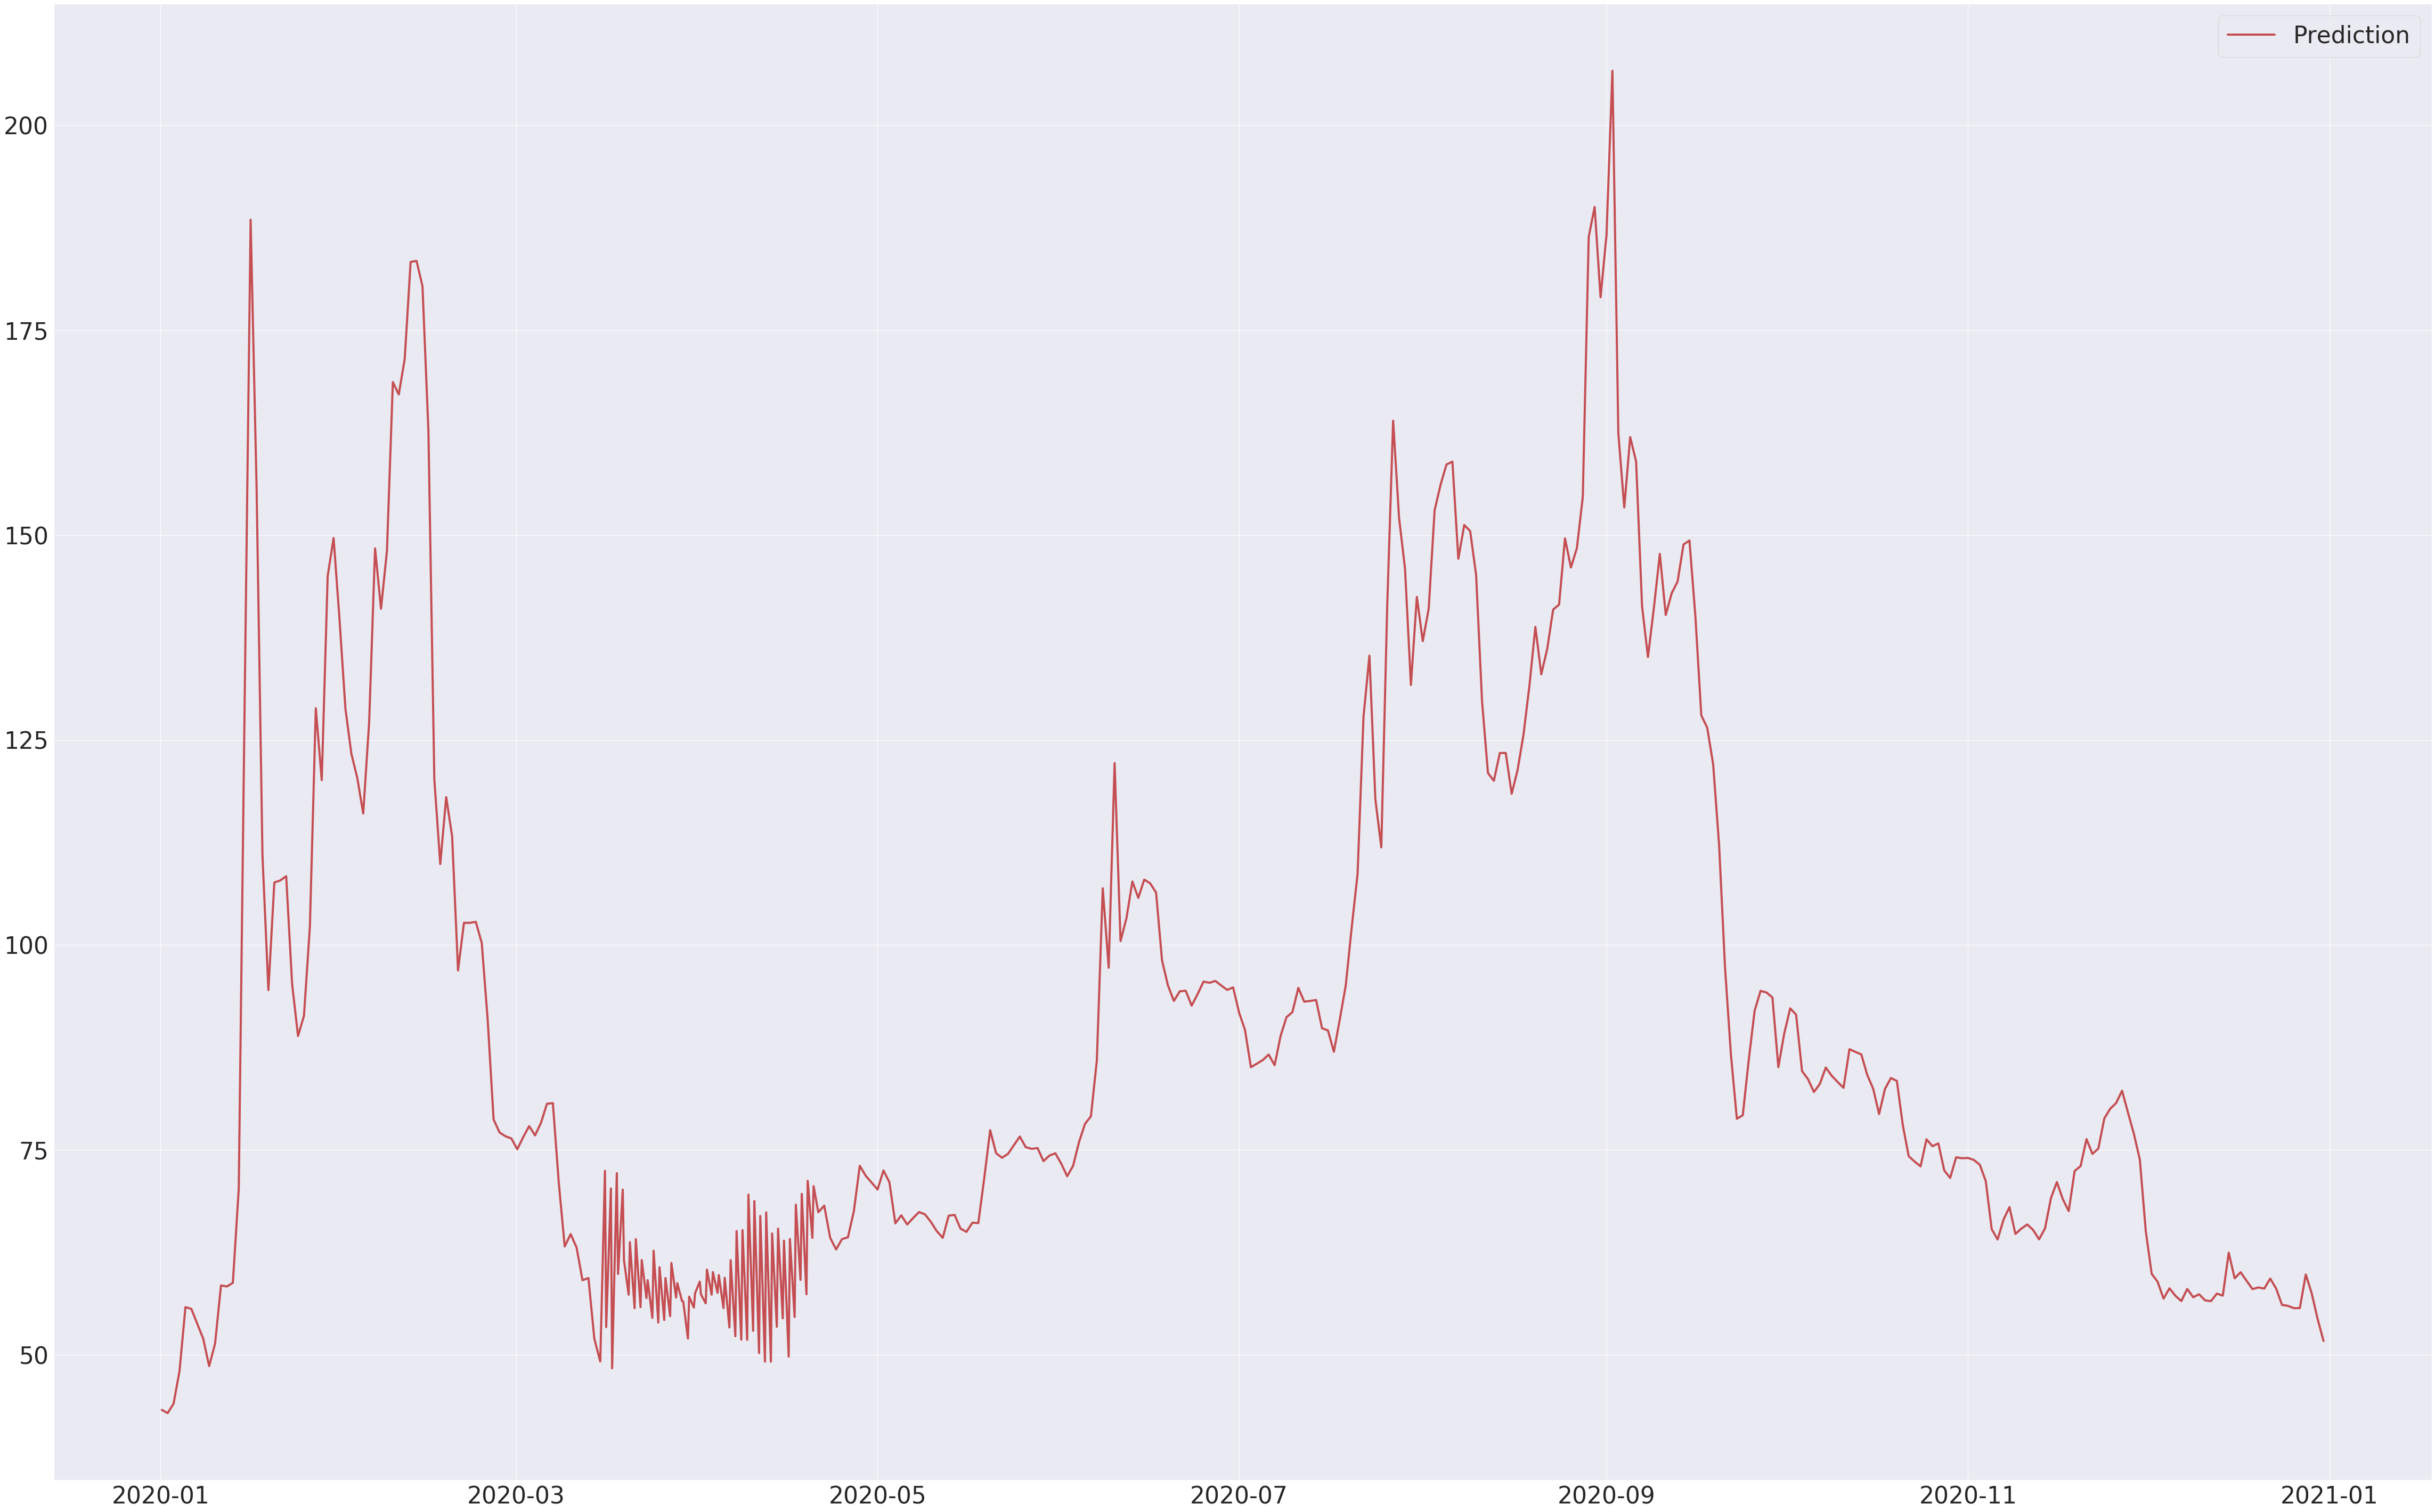

In [0]:
plt.figure(figsize=(80,51))
plt.plot(new_d['timestamp'],results,'-r',linewidth = 4,label = 'Prediction')
plt.legend(loc="upper right")

# XRP

In [0]:
new_d = pd.DataFrame([])
new_data = xrp[xrp['timestamp'].dt.year==2019].drop(['timestamp'],axis=1).copy()
j = future_Time
while j > 0 :
    new_data = TimeseriesGenerator(np.array(new_data),np.array(new_data),length=6,batch_size=100)
    for i in range(len(new_data)):
        x,y = new_data[i]
        new_d = new_d.append(list(y))
    
    new_data = new_d.copy()
    j = j - 1
    
new_d.reset_index(inplace=True)
new_d.drop(['index'],axis=1,inplace=True)
new_d.columns = list(xrp.drop(['timestamp'],axis=1).columns)

cur_date = cur_date = pd.to_datetime('2020-03-16',format='%Y-%m-%d')
for i in range(0,new_d.shape[0]):
    new_d.at[i,'timestamp'] = cur_date
    cur_date = cur_date + pd.to_timedelta(1,unit='d')
    
new_d = new_d[xrp.columns]
new_d = pd.concat([new_d,xrp_social],axis=0)
new_d.sort_values(by='timestamp',inplace=True)
new_d = new_d[new_d['timestamp'].dt.year == 2020]
new_d.reset_index(inplace=True,drop=True)

In [0]:
new_d['timestamp'] = pd.to_datetime(new_d['timestamp'])
new_d.sort_values(by = 'timestamp',inplace=True)

Bitcoins reached its peak in 2018

In [0]:
X = new_d.drop(['timestamp','close'],axis=1)
y = new_d['close'].copy()

In [0]:
X_transformed = MinMaxScaler().fit_transform(X)

In [0]:
X_transformed = X_transformed.reshape((X_transformed.shape[0],X_transformed.shape[1],1))

In [0]:
results = xrp_lstm.predict(X_transformed)

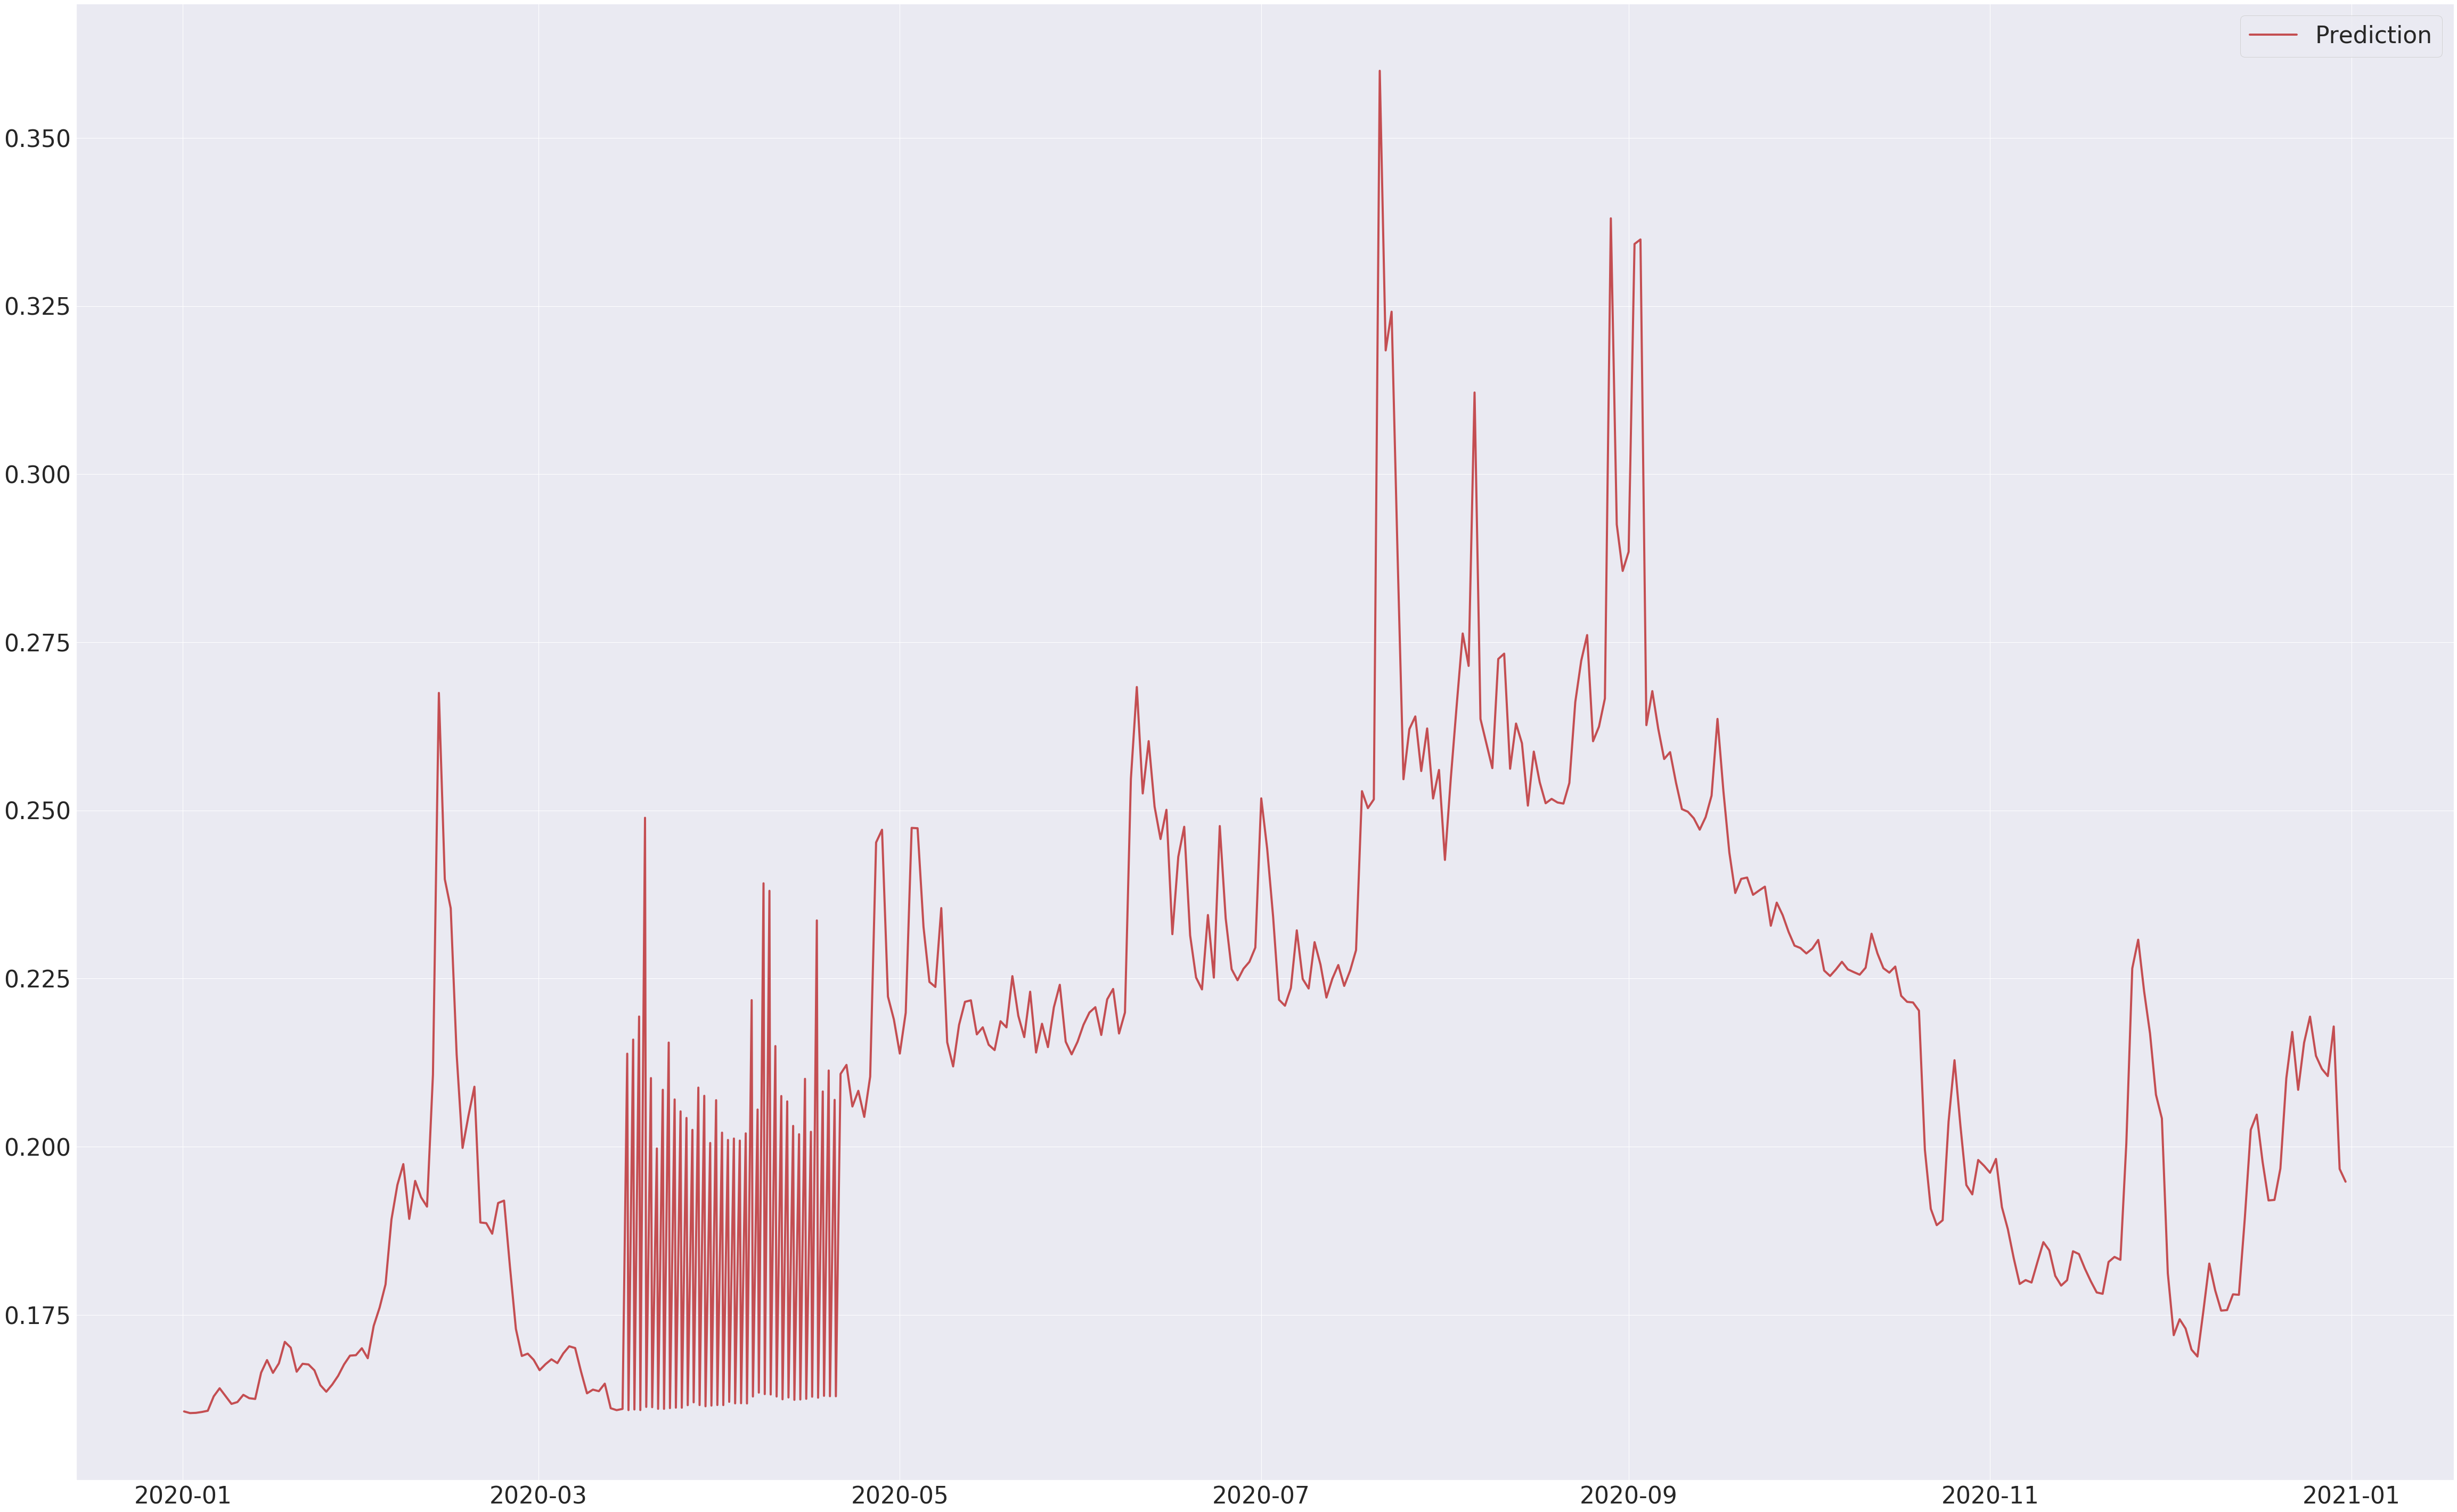

In [0]:
plt.figure(figsize=(80,51))
plt.plot(new_d['timestamp'],results,'-r',linewidth = 4,label = 'Prediction')
plt.legend(loc="upper right")

# NEO

In [0]:
new_d = pd.DataFrame([])
new_data = neo[neo['timestamp'].dt.year==2019].drop(['timestamp'],axis=1).copy()
j = future_Time
while j > 0 :
    new_data = TimeseriesGenerator(np.array(new_data),np.array(new_data),length=6,batch_size=100)
    for i in range(len(new_data)):
        x,y = new_data[i]
        new_d = new_d.append(list(y))
    
    new_data = new_d.copy()
    j = j - 1
    
new_d.reset_index(inplace=True)
new_d.drop(['index'],axis=1,inplace=True)
new_d.columns = list(neo.drop(['timestamp'],axis=1).columns)

cur_date = cur_date = pd.to_datetime('2020-03-16',format='%Y-%m-%d')
for i in range(0,new_d.shape[0]):
    new_d.at[i,'timestamp'] = cur_date
    cur_date = cur_date + pd.to_timedelta(1,unit='d')
    
new_d = new_d[neo.columns]
new_d = pd.concat([new_d,neo_social],axis=0)
new_d.sort_values(by='timestamp',inplace=True)
new_d = new_d[new_d['timestamp'].dt.year == 2020]
new_d.reset_index(inplace=True,drop=True)

In [0]:
new_d['timestamp'] = pd.to_datetime(new_d['timestamp'])
new_d.sort_values(by = 'timestamp',inplace=True)

Bitcoins reached its peak in 2018

In [0]:
X = new_d.drop(['timestamp','close'],axis=1)
y = new_d['close'].copy()

In [0]:
X_transformed = MinMaxScaler().fit_transform(X)

In [0]:
X_transformed = X_transformed.reshape((X_transformed.shape[0],X_transformed.shape[1],1))

In [0]:
results = neo_lstm.predict(X_transformed)

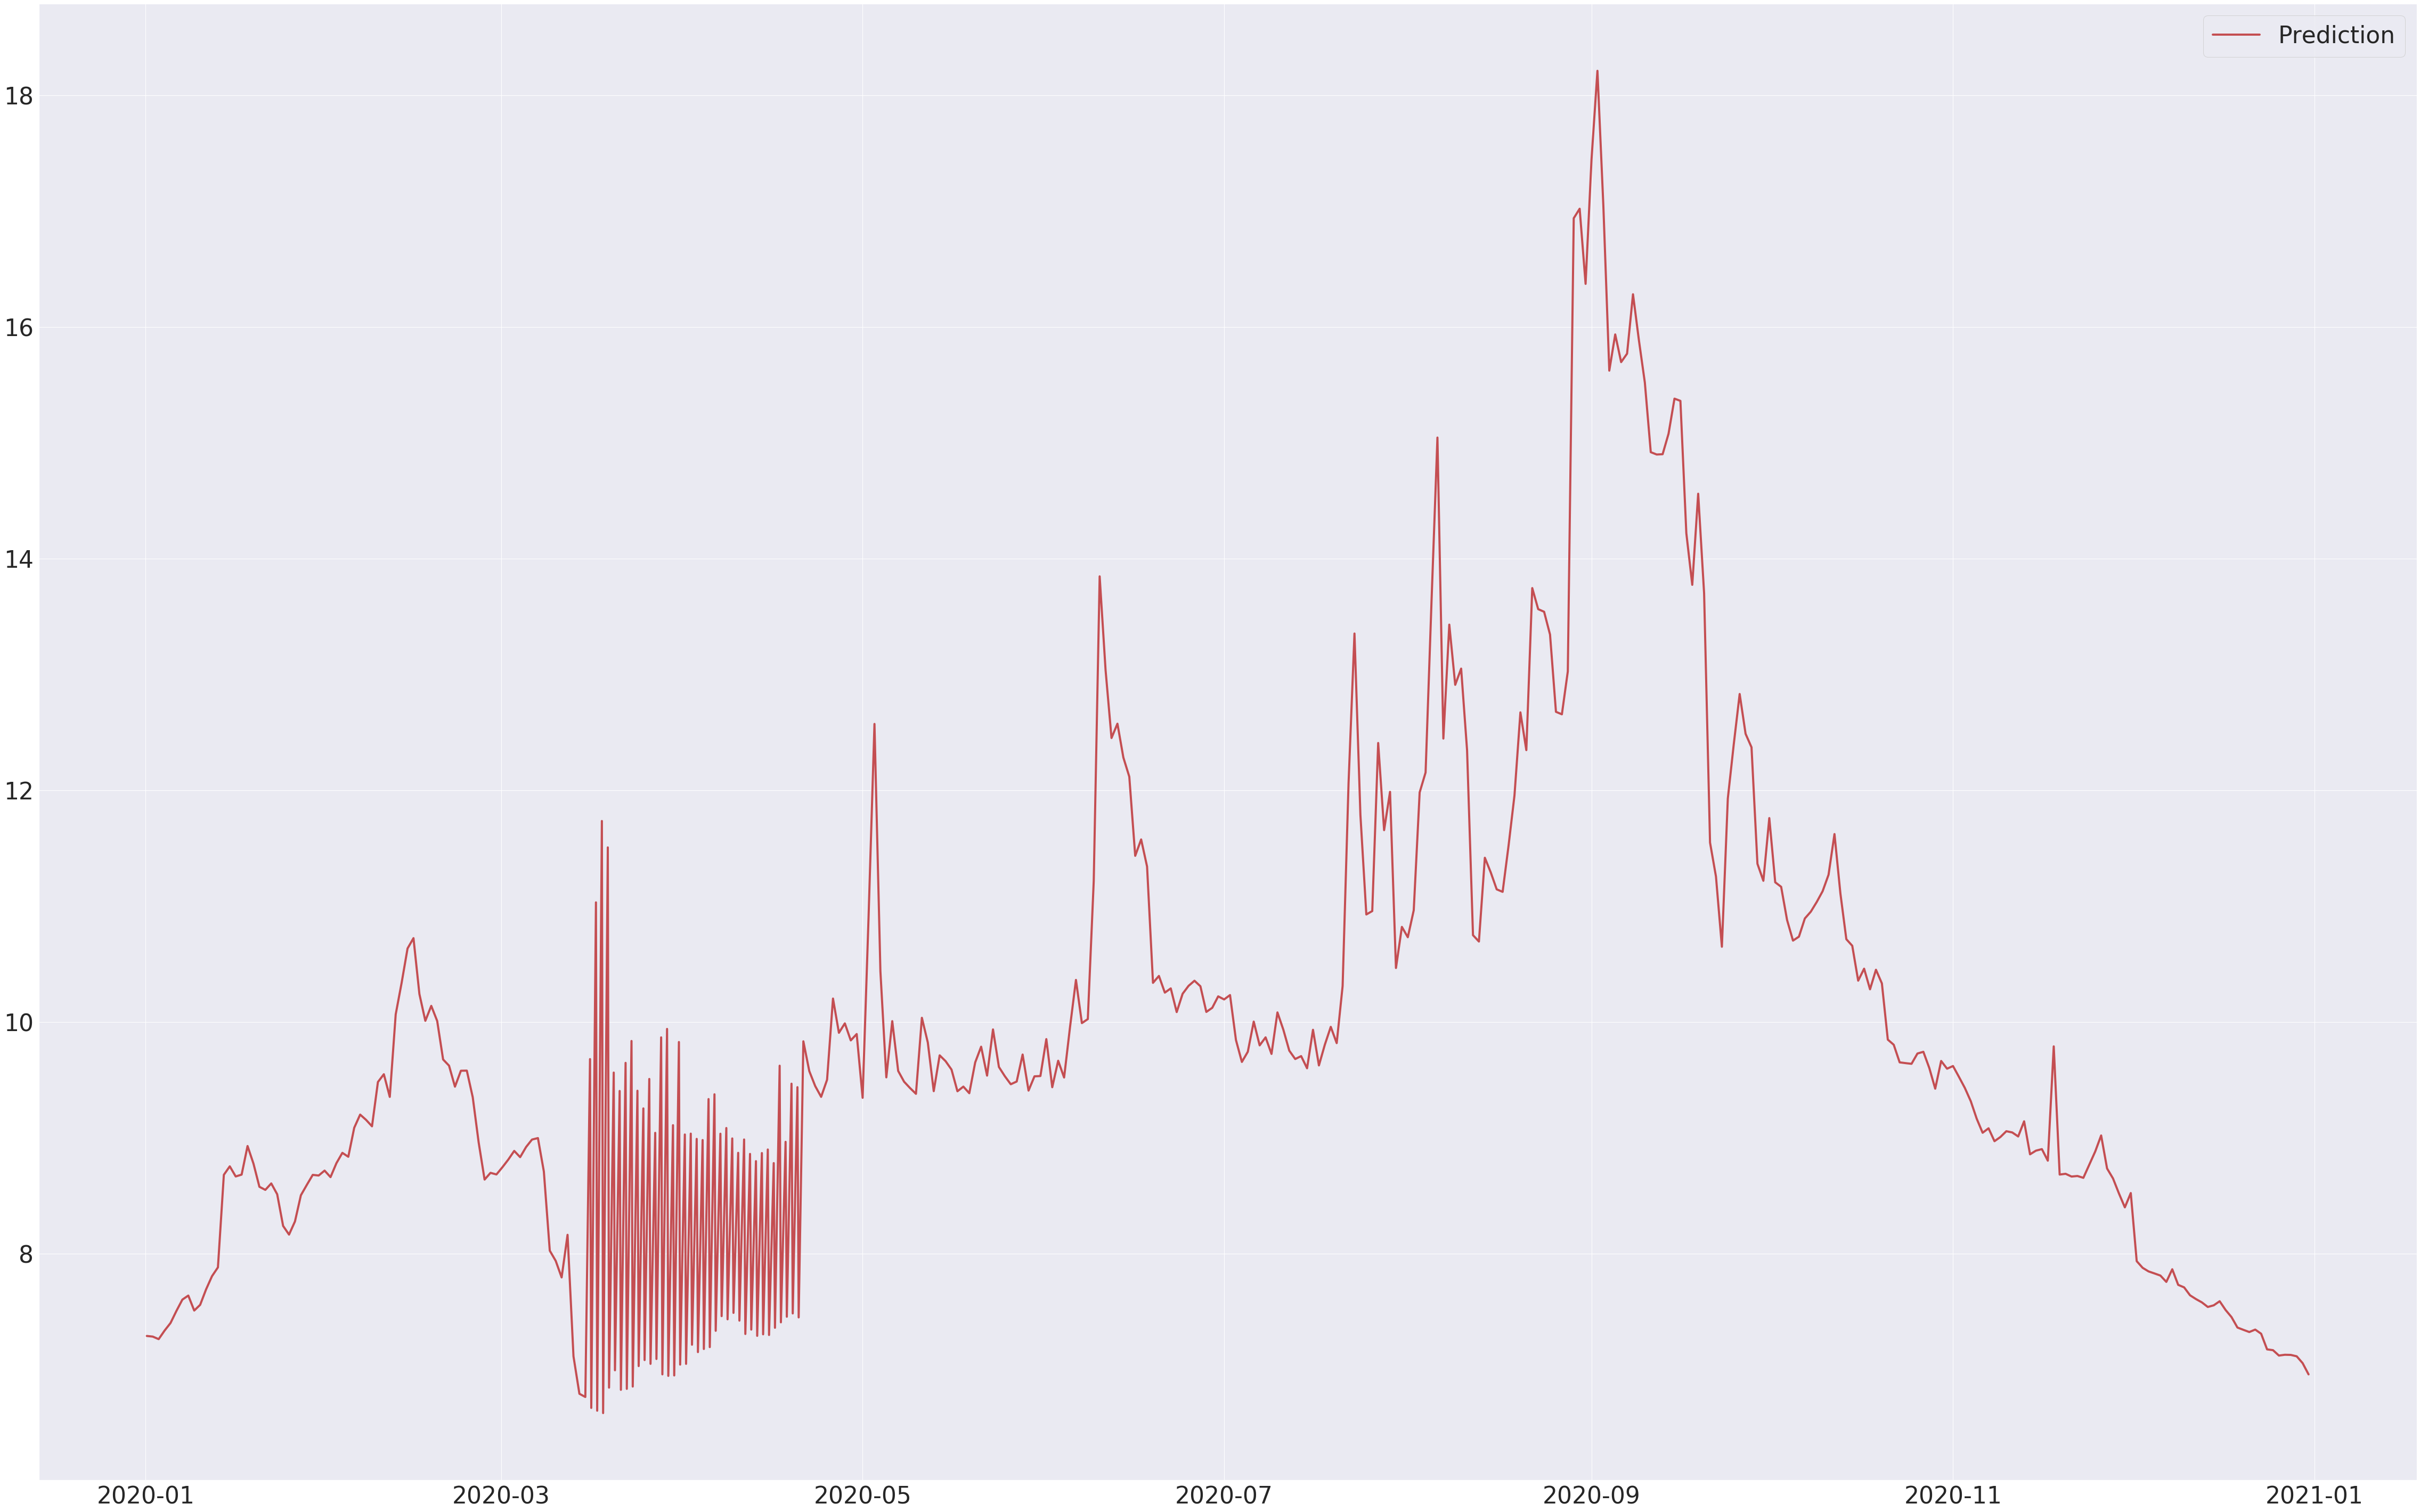

In [0]:
plt.figure(figsize=(80,51))
plt.plot(new_d['timestamp'],results,'-r',linewidth = 4,label = 'Prediction')
plt.legend(loc="upper right")

# Ethereum

In [0]:
new_d = pd.DataFrame([])
new_data = ethereum[ethereum['timestamp'].dt.year==2019].drop(['timestamp'],axis=1).copy()
j = future_Time
while j > 0 :
    new_data = TimeseriesGenerator(np.array(new_data),np.array(new_data),length=6,batch_size=100)
    for i in range(len(new_data)):
        x,y = new_data[i]
        new_d = new_d.append(list(y))
    
    new_data = new_d.copy()
    j = j - 1
    
new_d.reset_index(inplace=True)
new_d.drop(['index'],axis=1,inplace=True)
new_d.columns = list(ethereum.drop(['timestamp'],axis=1).columns)

cur_date = cur_date = pd.to_datetime('2020-03-16',format='%Y-%m-%d')
for i in range(0,new_d.shape[0]):
    new_d.at[i,'timestamp'] = cur_date
    cur_date = cur_date + pd.to_timedelta(1,unit='d')
    
new_d = new_d[ethereum.columns]
new_d = pd.concat([new_d,ethereum_social],axis=0)
new_d.sort_values(by='timestamp',inplace=True)
new_d = new_d[new_d['timestamp'].dt.year == 2020]
new_d.reset_index(inplace=True,drop=True)

In [0]:
new_d['timestamp'] = pd.to_datetime(new_d['timestamp'])
new_d.sort_values(by = 'timestamp',inplace=True)

Bitcoins reached its peak in 2018

In [0]:
X = new_d.drop(['timestamp','close'],axis=1)
y = new_d['close'].copy()

In [0]:
X_transformed = MinMaxScaler().fit_transform(X)

In [0]:
X_transformed = X_transformed.reshape((X_transformed.shape[0],X_transformed.shape[1],1))

In [0]:
results = ethereum_lstm.predict(X_transformed)

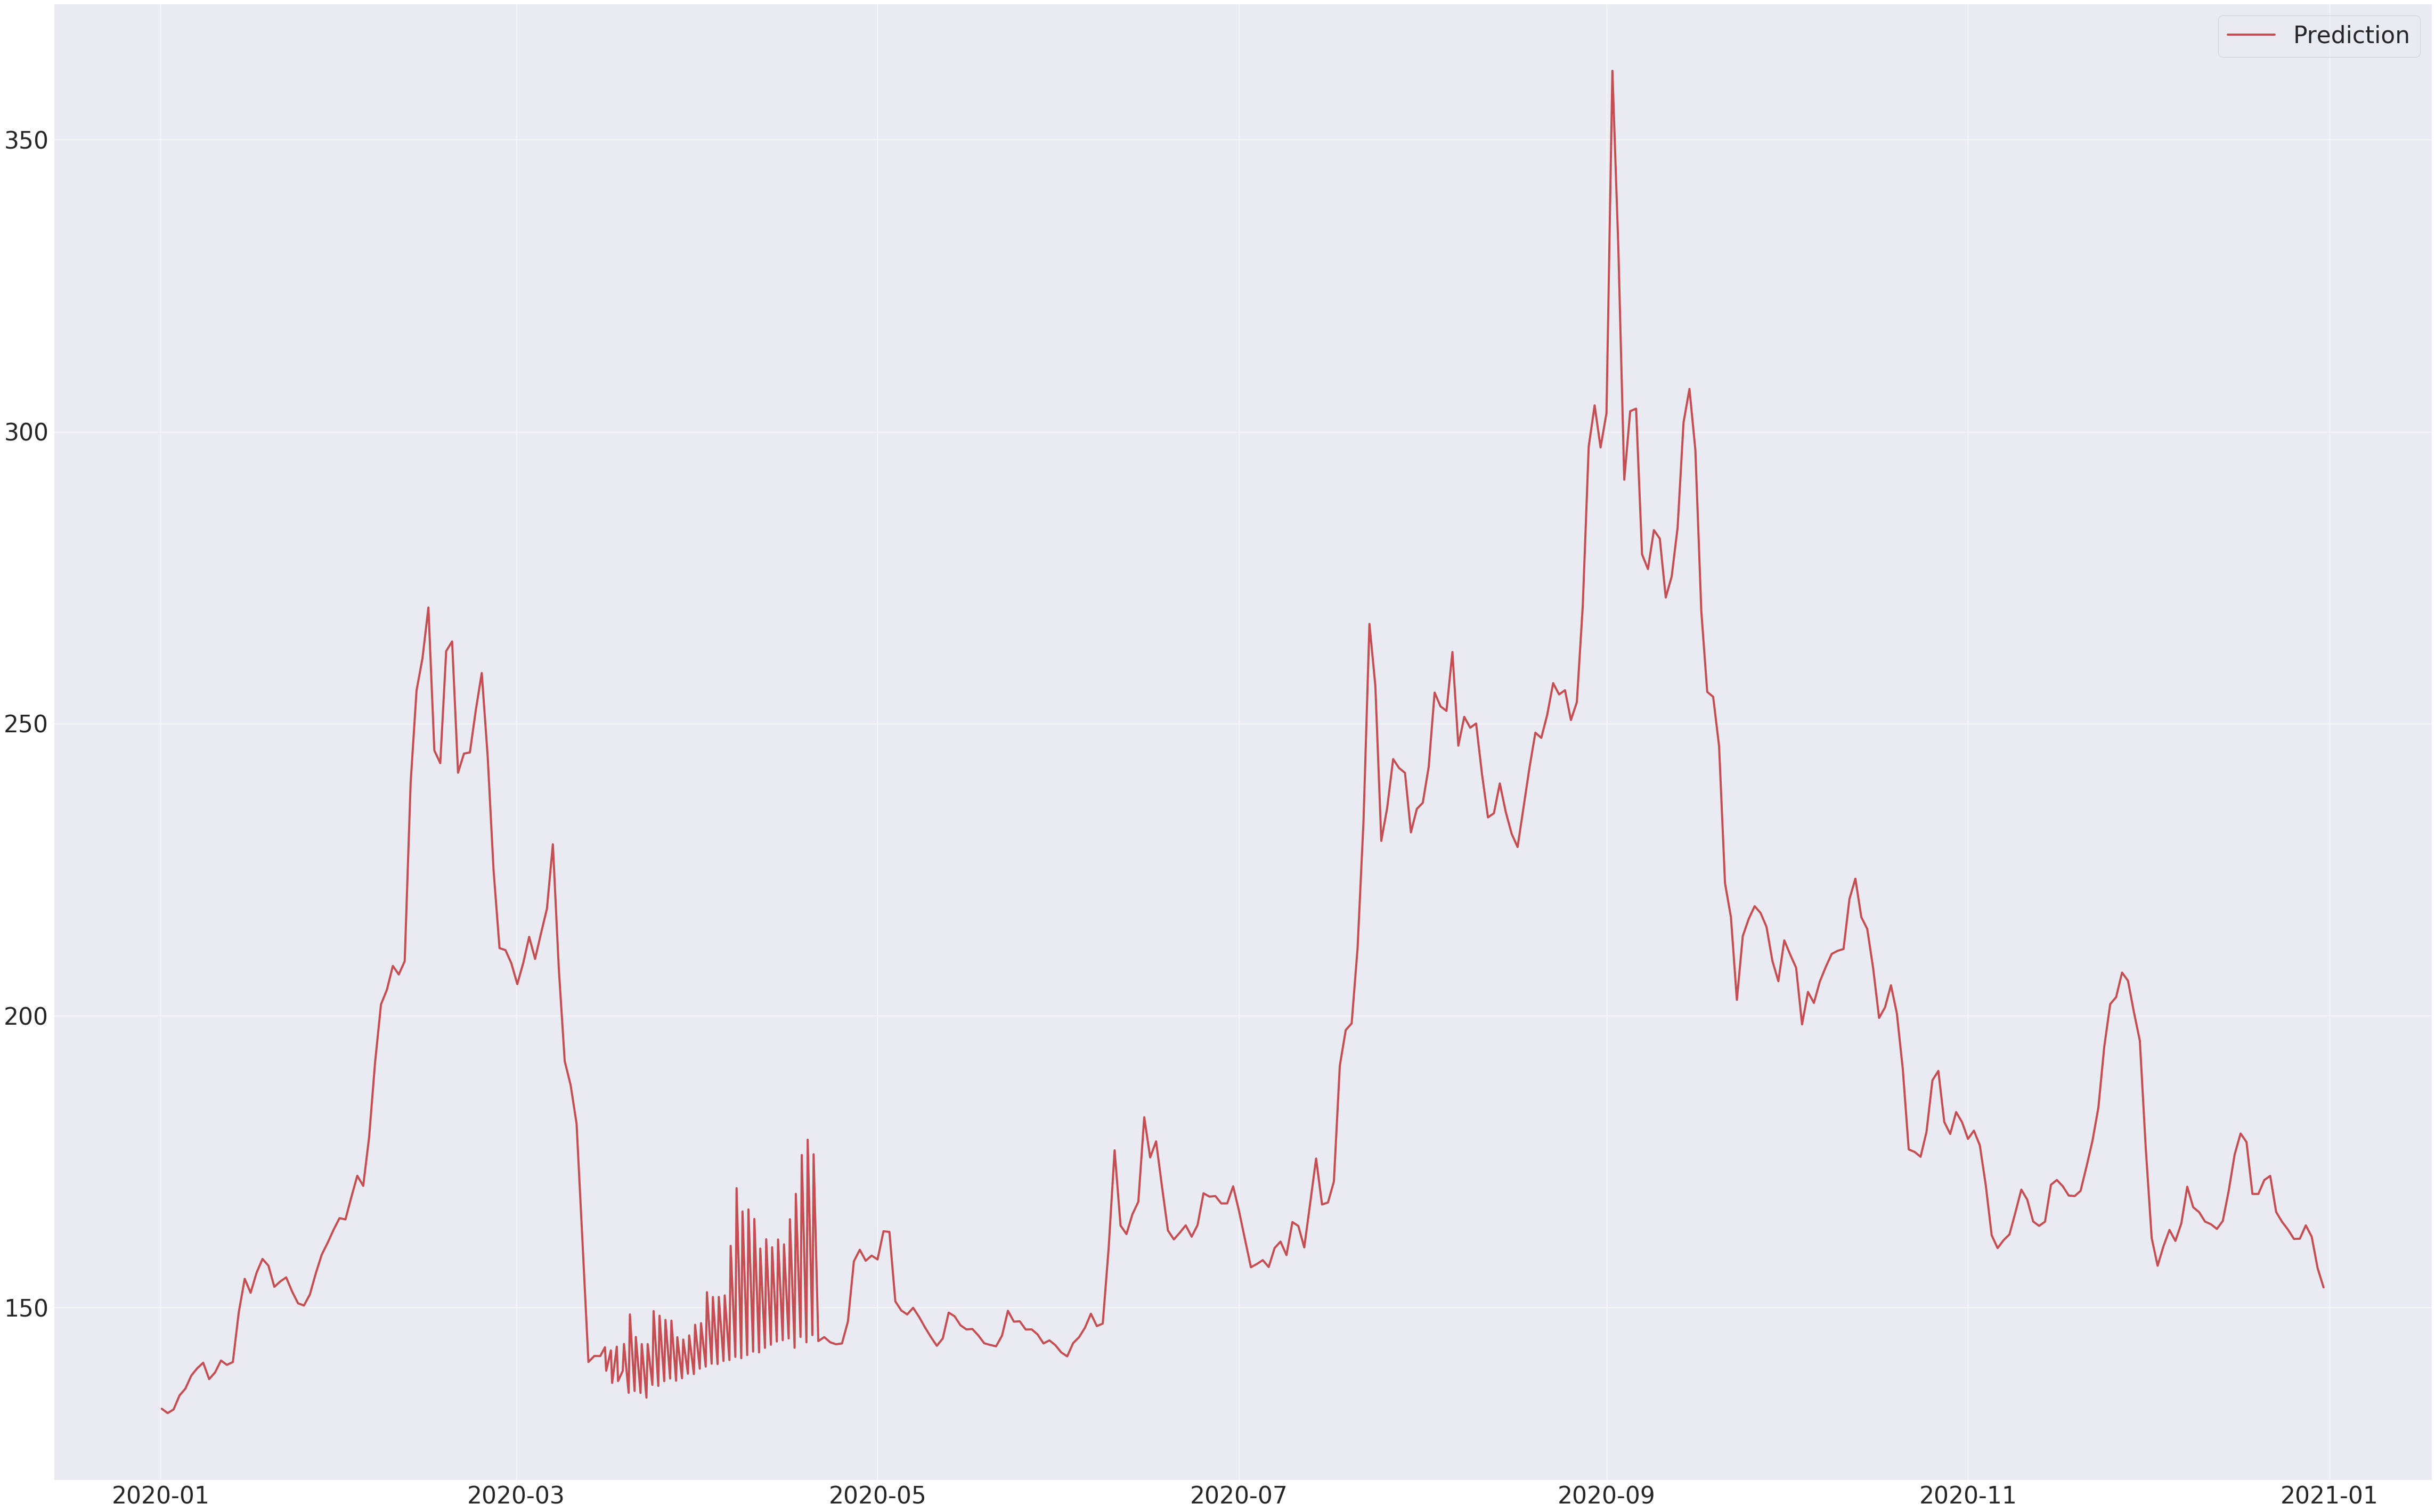

In [0]:
plt.figure(figsize=(80,51))
plt.plot(new_d['timestamp'],results,'-r',linewidth = 4,label = 'Prediction')
plt.legend(loc="upper right")

# EOS

In [0]:
new_d = pd.DataFrame([])
new_data = eos[eos['timestamp'].dt.year==2019].drop(['timestamp'],axis=1).copy()
j = future_Time
while j > 0 :
    new_data = TimeseriesGenerator(np.array(new_data),np.array(new_data),length=6,batch_size=100)
    for i in range(len(new_data)):
        x,y = new_data[i]
        new_d = new_d.append(list(y))
    
    new_data = new_d.copy()
    j = j - 1
    
new_d.reset_index(inplace=True)
new_d.drop(['index'],axis=1,inplace=True)
new_d.columns = list(eos.drop(['timestamp'],axis=1).columns)

cur_date = cur_date = pd.to_datetime('2020-03-16',format='%Y-%m-%d')
for i in range(0,new_d.shape[0]):
    new_d.at[i,'timestamp'] = cur_date
    cur_date = cur_date + pd.to_timedelta(1,unit='d')
    
new_d = new_d[eos.columns]
new_d = pd.concat([new_d,eos_social],axis=0)
new_d.sort_values(by='timestamp',inplace=True)
new_d = new_d[new_d['timestamp'].dt.year == 2020]
new_d.reset_index(inplace=True,drop=True)

In [0]:
new_d['timestamp'] = pd.to_datetime(new_d['timestamp'])
new_d.sort_values(by = 'timestamp',inplace=True)

Bitcoins reached its peak in 2018

In [0]:
X = new_d.drop(['timestamp','close'],axis=1)
y = new_d['close'].copy()

In [0]:
X_transformed = MinMaxScaler().fit_transform(X)

In [0]:
X_transformed = X_transformed.reshape((X_transformed.shape[0],X_transformed.shape[1],1))

In [0]:
results = eos_lstm.predict(X_transformed)

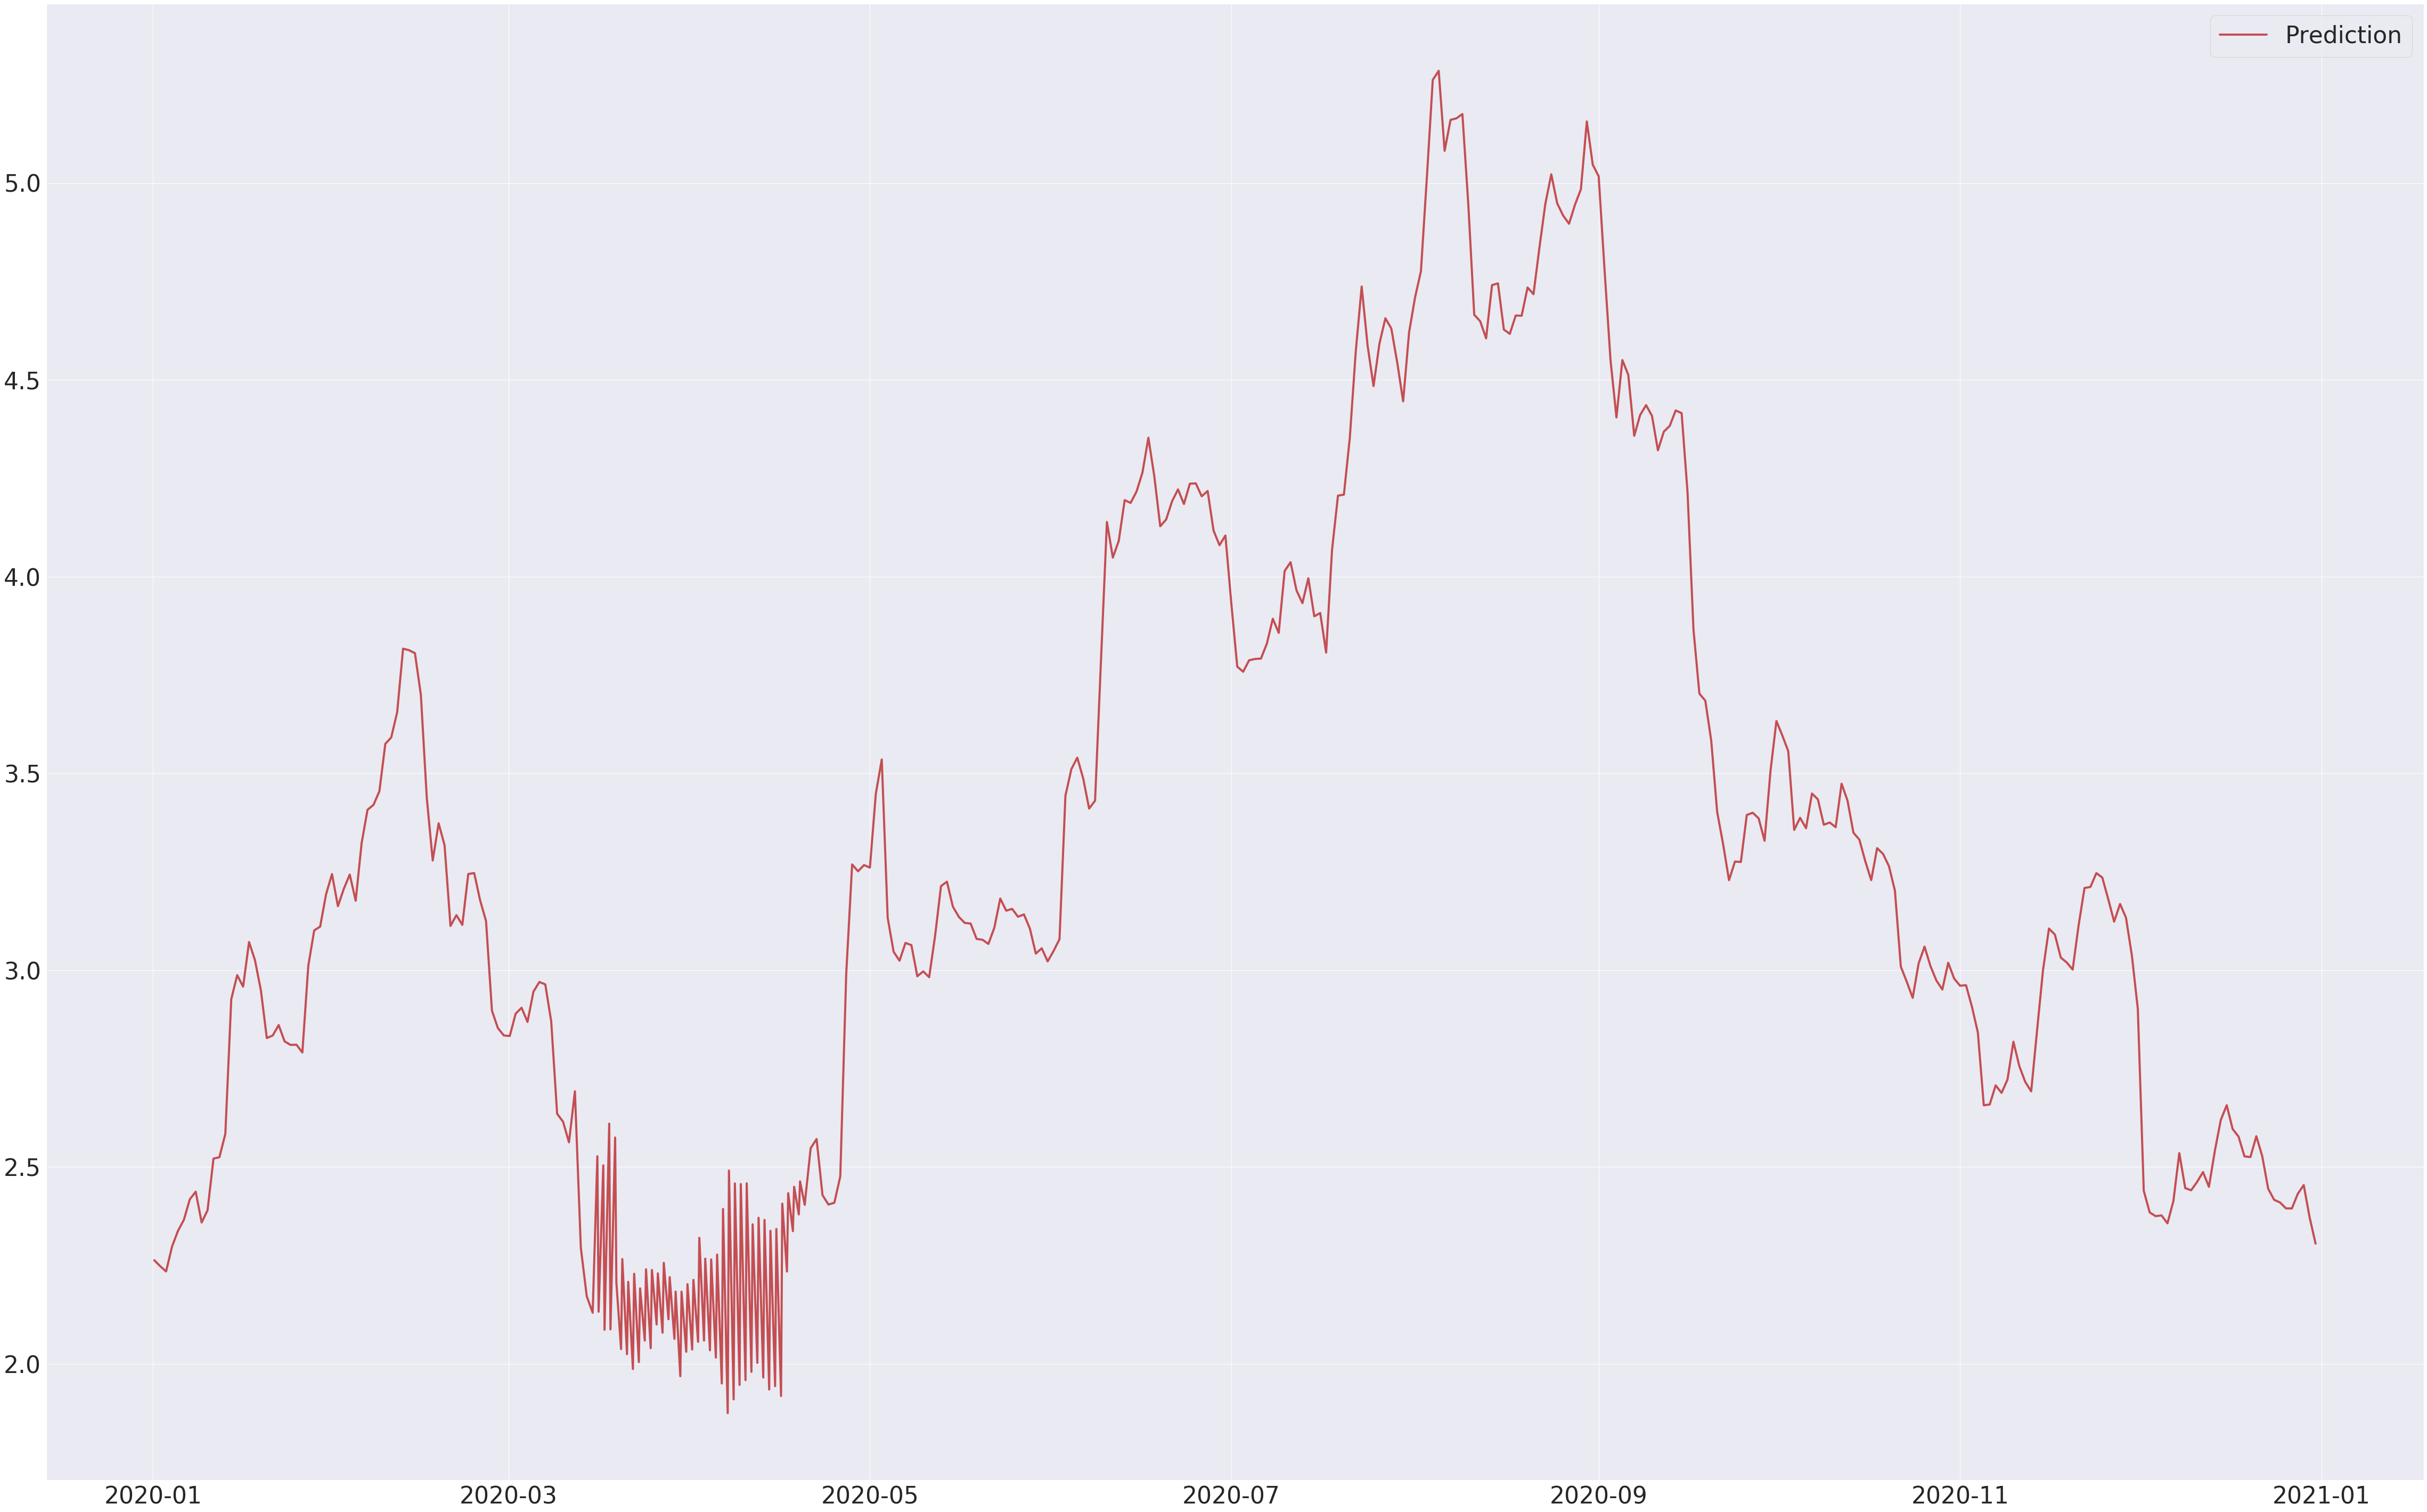

In [0]:
plt.figure(figsize=(80,51))
plt.plot(new_d['timestamp'],results,'-r',linewidth = 4,label = 'Prediction')
plt.legend(loc="upper right")

# Litecoin

In [0]:
new_d = pd.DataFrame([])
new_data = litecoin[litecoin['timestamp'].dt.year==2019].drop(['timestamp'],axis=1).copy()
j = future_Time
while j > 0 :
    new_data = TimeseriesGenerator(np.array(new_data),np.array(new_data),length=6,batch_size=100)
    for i in range(len(new_data)):
        x,y = new_data[i]
        new_d = new_d.append(list(y))
    
    new_data = new_d.copy()
    j = j - 1
    
new_d.reset_index(inplace=True)
new_d.drop(['index'],axis=1,inplace=True)
new_d.columns = list(litecoin.drop(['timestamp'],axis=1).columns)

cur_date = cur_date = pd.to_datetime('2020-03-16',format='%Y-%m-%d')
for i in range(0,new_d.shape[0]):
    new_d.at[i,'timestamp'] = cur_date
    cur_date = cur_date + pd.to_timedelta(1,unit='d')
    
new_d = new_d[litecoin.columns]
new_d = pd.concat([new_d,litecoin_social],axis=0)
new_d.sort_values(by='timestamp',inplace=True)
new_d = new_d[new_d['timestamp'].dt.year == 2020]
new_d.reset_index(inplace=True,drop=True)

In [0]:
new_d['timestamp'] = pd.to_datetime(new_d['timestamp'])
new_d.sort_values(by = 'timestamp',inplace=True)

Bitcoins reached its peak in 2018

In [0]:
X = new_d.drop(['timestamp','close'],axis=1)
y = new_d['close'].copy()

In [0]:
X_transformed = MinMaxScaler().fit_transform(X)

In [0]:
X_transformed = X_transformed.reshape((X_transformed.shape[0],X_transformed.shape[1],1))

In [0]:
results = litecoin_lstm.predict(X_transformed)

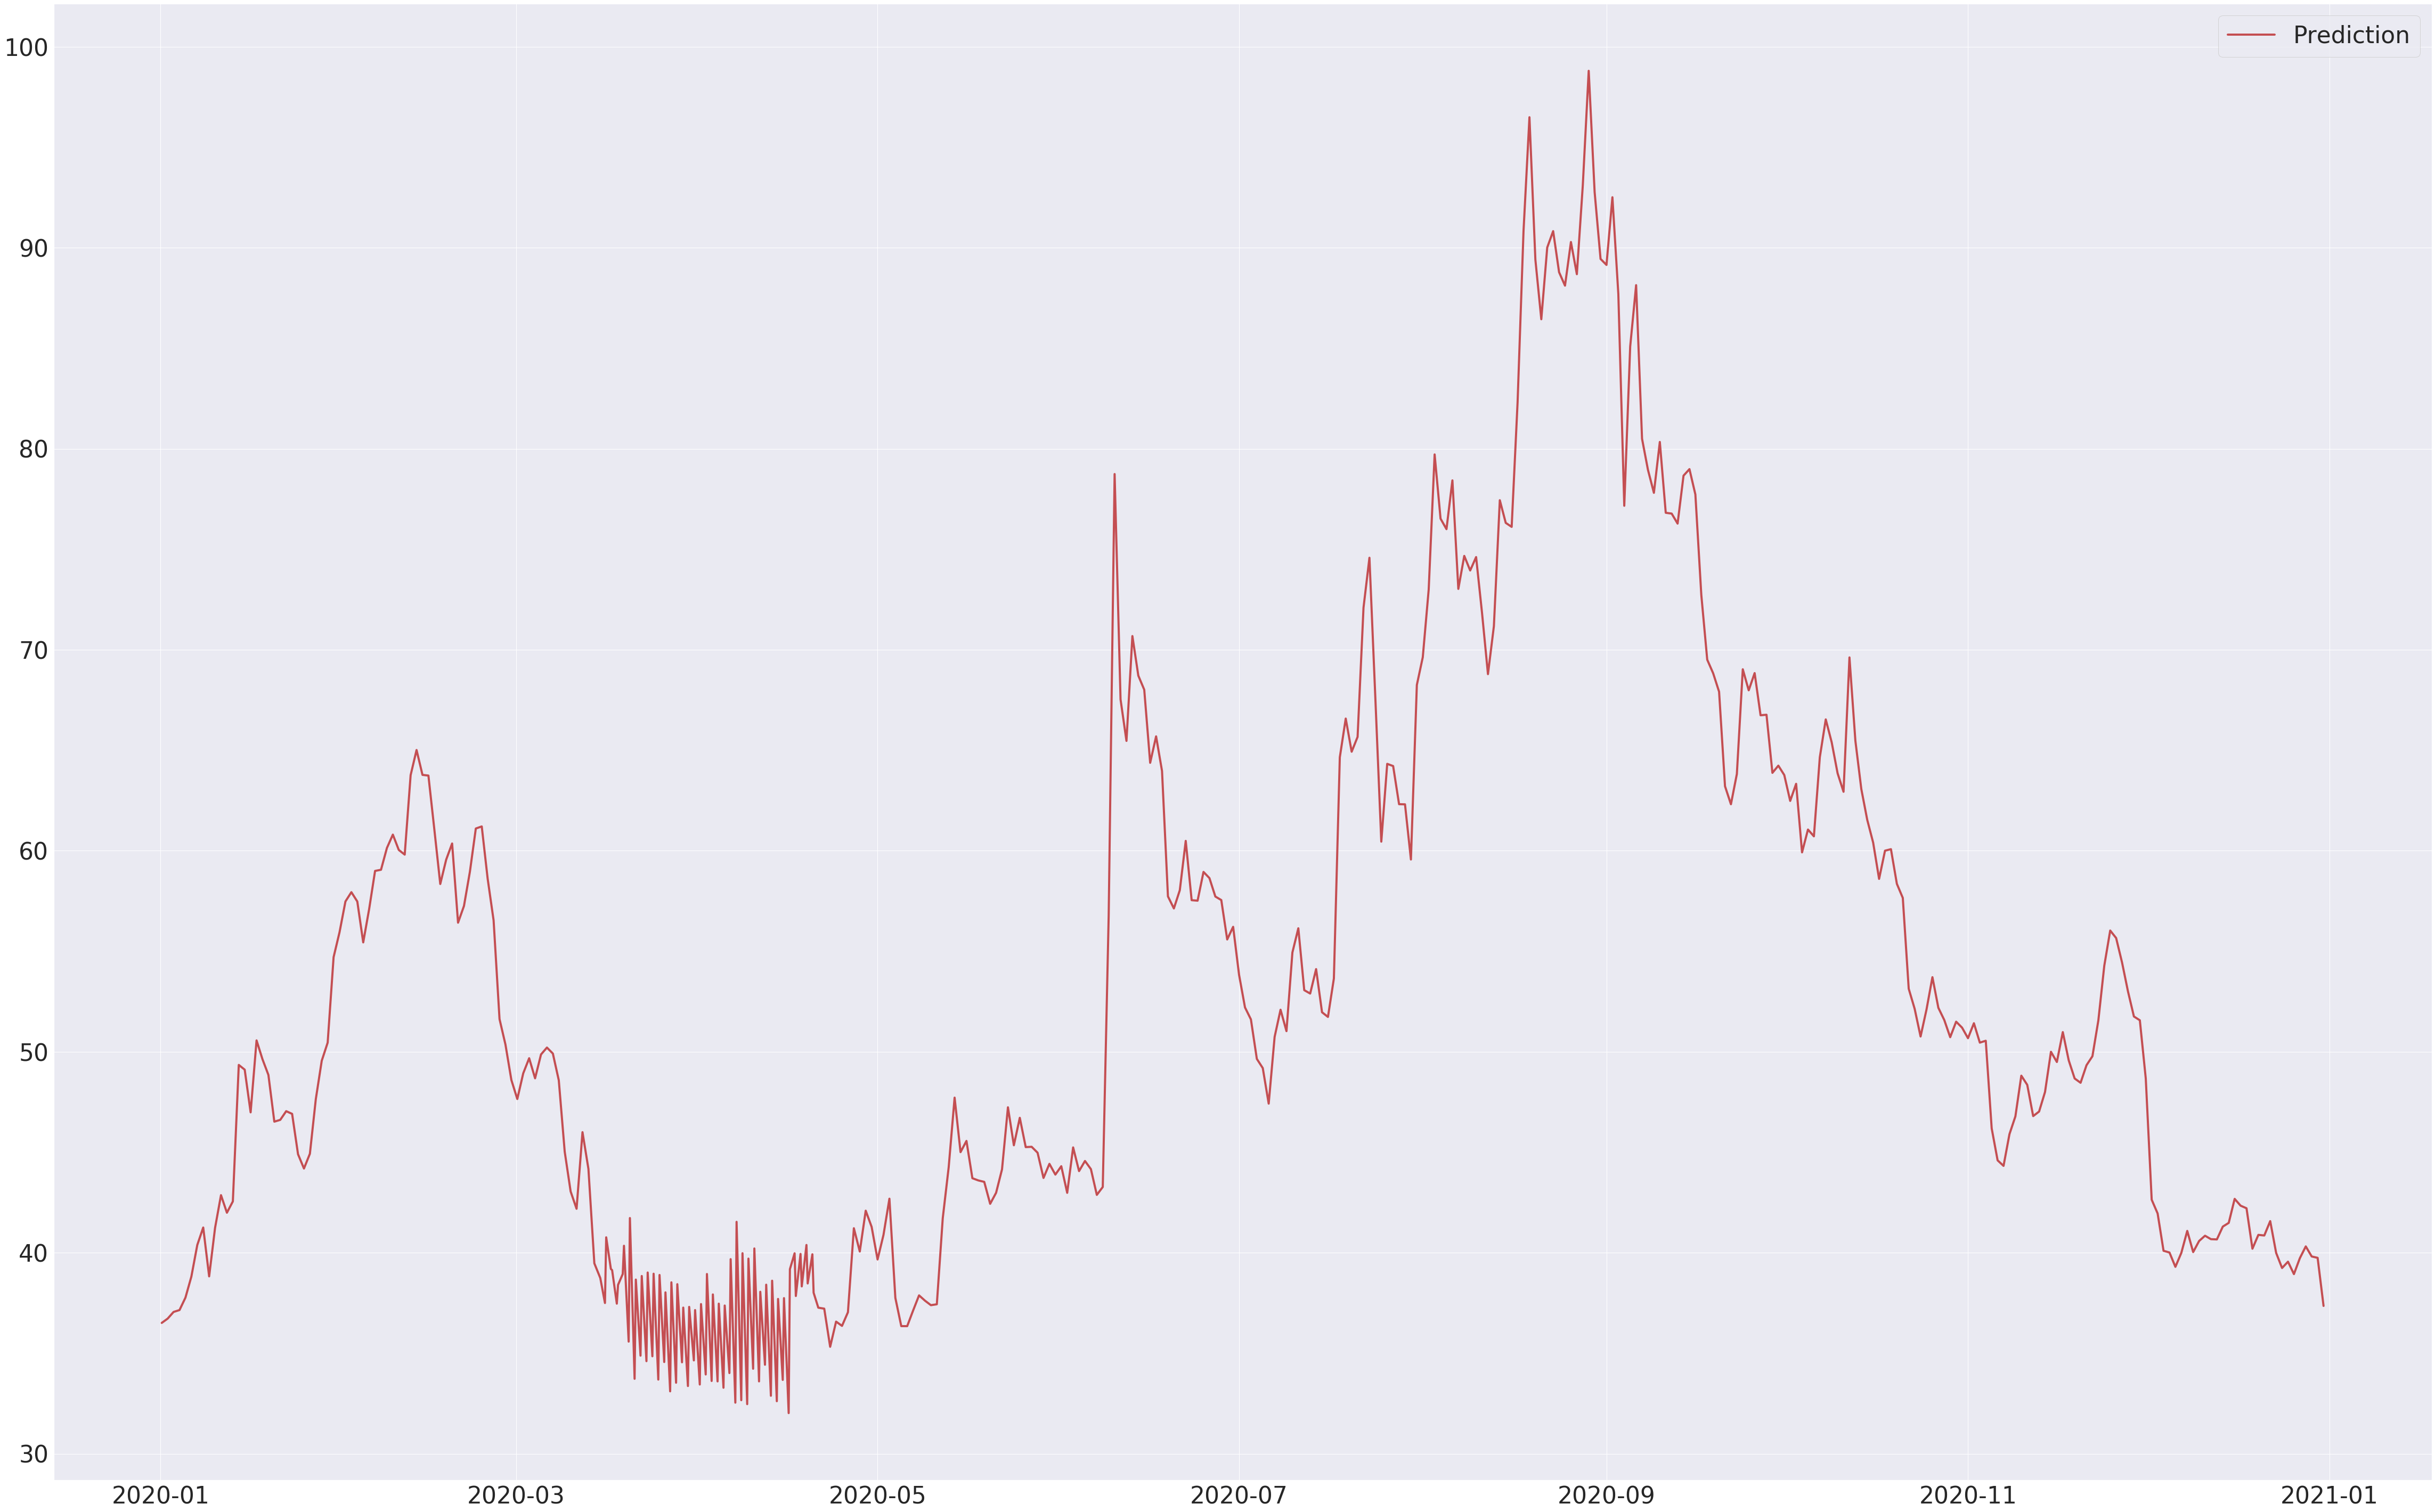

In [0]:
plt.figure(figsize=(80,51))
plt.plot(new_d['timestamp'],results,'-r',linewidth = 4,label = 'Prediction')
plt.legend(loc="upper right")